In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from datetime import datetime as dt

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML
display(HTML("<style>.jp-CodeCell.jp-mod-outputsScrolled .jp-Cell-outputArea { max-height: 44em; }</style>"))



In [2]:
df = pd.read_csv("nyc-rolling-sales.csv")


In [3]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [4]:
df.columns = ['Unnamed:_0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed:_0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING_CLASS_CATEGORY         84548 non-null  object
 4   TAX_CLASS_AT_PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING_CLASS_AT_PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT_NUMBER                84548 non-null  object
 11  ZIP_CODE                        84548 non-null  int64 
 12  RESIDENTIAL_UNITS               84548 non-null

1. LAND_SQUARE_FEET, GROSS_SQUARE_FEET and SALE_PRICE columns are objects. They should be int, we will check it.
2. SALE_DATE is also object, we can convert it to datetime data type so we can work with datetime.

In [6]:
df.head().T

,0,1,2,3,4
Unnamed:_0,4,5,6,7,8
BOROUGH,1,1,1,1,1
NEIGHBORHOOD,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY,ALPHABET CITY
BUILDING_CLASS_CATEGORY,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS
TAX_CLASS_AT_PRESENT,2A,2,2,2B,2A
BLOCK,392,399,399,402,404
LOT,6,26,39,21,55
EASE-MENT,,,,,
BUILDING_CLASS_AT_PRESENT,C2,C7,C7,C4,C2
ADDRESS,153 AVENUE B,234 EAST 4TH STREET,197 EAST 3RD STREET,154 EAST 7TH STREET,301 EAST 10TH STREET


In [7]:
df.sample(20).T

,10525,25241,73304,55526,73518,55452,32480,29497,70361,55478,34463,61153,37984,17586,44530,11688,2691,70217,60472,11865
Unnamed:_0,10529,6939,23906,6128,24120,6054,7129,4146,20963,6080,9112,11755,12633,17590,19179,11692,2695,20819,11074,11869
BOROUGH,1,2,4,4,4,4,3,3,4,4,3,4,3,1,3,1,1,4,4,1
NEIGHBORHOOD,ROOSEVELT ISLAND,WILLIAMSBRIDGE,SOUTH OZONE PARK,FAR ROCKAWAY,SPRINGFIELD GARDENS,FAR ROCKAWAY,CANARSIE,BOROUGH PARK,RICHMOND HILL,FAR ROCKAWAY,CROWN HEIGHTS,FRESH MEADOWS,FLATBUSH-EAST,UPPER WEST SIDE (96-116),PARK SLOPE,UPPER EAST SIDE (59-79),FLATIRON,RICHMOND HILL,FOREST HILLS,UPPER EAST SIDE (59-79)
BUILDING_CLASS_CATEGORY,13 CONDOS - ELEVATOR APARTMENTS,10 COOPS - ELEVATOR APARTMENTS,02 TWO FAMILY DWELLINGS,02 TWO FAMILY DWELLINGS,01 ONE FAMILY DWELLINGS,01 ONE FAMILY DWELLINGS,02 TWO FAMILY DWELLINGS,03 THREE FAMILY DWELLINGS,02 TWO FAMILY DWELLINGS,01 ONE FAMILY DWELLINGS,07 RENTALS - WALKUP APARTMENTS,01 ONE FAMILY DWELLINGS,01 ONE FAMILY DWELLINGS,10 COOPS - ELEVATOR APARTMENTS,03 THREE FAMILY DWELLINGS,01 ONE FAMILY DWELLINGS,10 COOPS - ELEVATOR APARTMENTS,02 TWO FAMILY DWELLINGS,10 COOPS - ELEVATOR APARTMENTS,10 COOPS - ELEVATOR APARTMENTS
TAX_CLASS_AT_PRESENT,2,2,1,1,1,1,1,1,1,1,2A,1,1,2,1,1,2,1,2,2
BLOCK,1373,4845,11803,15534,12669,15608,8126,5612,9414,15683,1256,7165,7742,1876,1063,1388,851,9200,2150,1379
LOT,1114,11,43,12,64,19,23,70,84,65,42,19,31,7,10,48,13,27,1,51
EASE-MENT,,,,,,,,,,,,,,,,,,,,
BUILDING_CLASS_AT_PRESENT,R4,D4,B2,B2,A1,A2,B1,C0,B3,A3,C5,A1,A9,D4,C0,A4,D4,B3,D4,D4
ADDRESS,455 MAIN STREET,"730 EAST 232 STREET, 2G",135-12 117TH STREET,13-25 BRUNSWICK AVENUE,121-44 LUCAS STREET,155 BEACH 4TH STREET,889 EAST 93RD STREET,1423 45TH STREET,95-17 112TH STREET,14-43 GRANADA PLACE,264 BROOKLYN AVENUE,73-15 177TH STREET,979 EAST 38TH STREET,"245 WEST 104TH STREET, 9C",184 BERKELEY PLACE,32 EAST 74TH STREET,"21 EAST 22ND STREET, 10A",86-50 105TH STREET,64-35 YELLOWSTONE BLVD,"30 EAST 65TH STREET, 16C"


# Data Cleaning

There are empty values in LAND_SQUARE_FEET, GROSS_SQUARE_FEET	and SALE_PRICE	columns. But they are not Null in the data. There are "-" symbols in these values.

In [8]:
df["GROSS_SQUARE_FEET"].iloc[12:20]

12     -  
13     -  
14     -  
15     -  
16     -  
17     -  
18     -  
19     -  
Name: GROSS_SQUARE_FEET, dtype: object

In [9]:
df["GROSS_SQUARE_FEET"].iloc[12], df["GROSS_SQUARE_FEET"].iloc[17], df["LAND_SQUARE_FEET"].iloc[12], df["SALE_PRICE"].iloc[7]

(' -  ', ' -  ', ' -  ', ' -  ')

In [10]:
# Now we will replace ' -  ' with np.nan. 
# Before doing this we will save original df as df0. We may need it later. 
df0 = df.copy()
df = df.replace(" -  ", np.nan)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed:_0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING_CLASS_CATEGORY         84548 non-null  object
 4   TAX_CLASS_AT_PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING_CLASS_AT_PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT_NUMBER                84548 non-null  object
 11  ZIP_CODE                        84548 non-null  int64 
 12  RESIDENTIAL_UNITS               84548 non-null

We will convert the data types to the appropriate format.

In [12]:
df[["GROSS_SQUARE_FEET", "LAND_SQUARE_FEET", "SALE_PRICE"]] = df[["GROSS_SQUARE_FEET", "LAND_SQUARE_FEET", 
                                                                  "SALE_PRICE"]].astype("float")

In [13]:
df["SALE_DATE"] = pd.to_datetime(df["SALE_DATE"])

In [14]:
from colorama import Fore, Style

def first_looking(df, col):
    """This function shows the data type, percentage of null values, value counts, unique values 
    and descriptive statistics in a column.    
    Parameters:
    df: Dataframe object
    col: String, Column name."""
    
    print(Fore.RED, "Column name    : ", col, Style.RESET_ALL)
    print("  Data Type     : ", df[col].dtypes)
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("Null values")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("Value counts")
    print(df[col].value_counts(dropna = False))
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("Unique values")
    print(df[col].unique())
    print("num_of_uniques : ", df[col].nunique())
    print(Fore.RED + "--------------------------------", Style.RESET_ALL)
    print("Descriptive statistics")
    print(df[col].describe())
    print()
    print()


We will change column order for doing analysis easier.

In [15]:
df = df[['Unnamed:_0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'TAX_CLASS_AT_TIME_OF_SALE', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_TIME_OF_SALE', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',        
       'SALE_PRICE', 'SALE_DATE']]

In [16]:
# for col in df.columns:
#     first_looking(df, col)

When we run above cell for the first time we see that there are some empty  (" ") values  in 'TAX_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT' columns . So we will replace them with np.nan firstly and then run first_looking() function below again. 

In [17]:
df = df.replace(" ", np.nan)

In [18]:
for col in df.columns:
    first_looking(df, col)

 Column name    :  Unnamed:_0 
  Data Type     :  int64
-------------------------------- 
Null values
per_of_nulls   :  % 0.0
num_of_nulls   :  0
-------------------------------- 
Value counts
Unnamed:_0
4        5
4699     5
4710     5
4709     5
4708     5
        ..
24948    1
24949    1
24950    1
24951    1
26739    1
Name: count, Length: 26736, dtype: int64
-------------------------------- 
Unique values
[    4     5     6 ... 26737 26738 26739]
num_of_uniques :  26736
-------------------------------- 
Descriptive statistics
count    84548.000000
mean     10344.359878
std       7151.779436
min          4.000000
25%       4231.000000
50%       8942.000000
75%      15987.250000
max      26739.000000
Name: Unnamed:_0, dtype: float64


 Column name    :  BOROUGH 
  Data Type     :  int64
-------------------------------- 
Null values
per_of_nulls   :  % 0.0
num_of_nulls   :  0
-------------------------------- 
Value counts
BOROUGH
4    26736
3    24047
1    18306
5     8410
2     7049

## Notes from first looking at the colums and understanding the data

1. Column Unnamed:_0 is not giving any meaningful information, we will drop it.
2. Column BOROUGH: A digit code for the borough the property is located in; 
    in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5). 
    Below we will create a BOROUGH_NAME column for using in visualizations.
3. NEIGHBORHOOD column is object and contains 254 different NEIGHBORHOODs.
4. There are 47 different building class categories.
5. TAX_CLASS_AT_PRESENT contains 11 unique values. This column has 0.87 % (738 values) null values. 
6. TAX CLASS AT SALE contains 4 unique values.
7. The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL. If we need a unique identifier for each row we can create a BBL column.
    A Block is a sub-division of the borough on which real properties are located. A Lot is a subdivision of a Block and represents the property unique location.
8. Eastment column: All values are  '' (empty string or space). We can drop this column.
    A property easement is a legal situation in which the title to a specific piece of land remains with the landowner, but another individual or entity is given the right to use that land for a distinct purpose.  
9. BUILDING_CLASS_AT_PRESENT column contains 167 unique values. This column has 0.87 % (738 values) null values. 
10. BUILDING_CLASS_AT_TIME_OF_SALE column contains 166 different building classes. 

11. There are 67563 different addresses in ADDRESS column. 
12. There are 3989 different APARTMENT_NUMBER in APARTMENT_NUMBER column and, there are % 77.47 null values in this column. We can drop this column. 
13. There are 982 0 values in ZIP_CODE column. 
14. There are 24783 0 values in RESIDENTIAL_UNITS column. 
15. There are 79429 0 values in COMMERCIAL UNITS column.
16. There are 19762 0 values in TOTAL_UNITS column. We will convert 0 values in this column to np.nan.
17. There are % 31 Null values  in LAND_SQUARE_FEET column. Also 10326 values are 0 in this column. 
    Below we replaced 0 values to np.nan and now we have 43 % null values in this column.
18. There are % 32 Null values  in GROSS_SQUARE_FEET column. Also 11417 values are 0 in this column.
    Below we replaced 0 values to np.nan and now we have 46 % null values in this column.
19. YEAR_BUILT column have 6970 0 values, we will replace them with np.nan. Also this column has a 1111 value. We assume that it is wrong record and we will we will replace it also with np.nan.
20. We will create an age column from YEAR_BUILT column.

    

Dropping columns and raws

In [19]:
df.drop(columns= ["Unnamed:_0", "EASE-MENT", "APARTMENT_NUMBER"], inplace=True)

In [20]:
df["BOROUGH_NAME"] = df["BOROUGH"].map({1: "Manhattan", 2: "Bronx", 3 : "Brooklyn", 
                                        4: "Queens", 5: "Staten_Island"})

In [21]:
df.drop(columns = ["BOROUGH"], inplace = True )

In [22]:
df["TOTAL_UNITS"].replace(0, np.nan, inplace = True)

In [23]:
df["YEAR_BUILT"].replace([1111, 0], np.nan, inplace = True)

In [24]:
df["AGE"] = dt.now().year - df["YEAR_BUILT"]

In [25]:
first_looking(df, "AGE")

 Column name    :  AGE 
  Data Type     :  float64
-------------------------------- 
Null values
per_of_nulls   :  % 8.25
num_of_nulls   :  6971
-------------------------------- 
Value counts
AGE
NaN      6971
103.0    6045
93.0     5043
98.0     4312
113.0    3585
         ... 
191.0       1
174.0       1
168.0       1
135.0       1
343.0       1
Name: count, Length: 157, dtype: int64
-------------------------------- 
Unique values
[123. 110. 103. 113.  14.  98. 121.  95.  93.  88.  86. 108.  73.  94.
 122.  83.  18.  nan  34.   9.  15.  58.  10.  20.  17.  16.  72. 124.
 173. 118. 159. 106. 112.  40.  97.  60.  63. 134. 125.  84.  85.  96.
 114.  65. 119. 116.  36.  92.  39.  75.  19. 105. 148.  11.  50.  12.
 101.  22.  91.  43. 115.  70. 117.   8.  77. 102.  13.  69.  99.  33.
 133.  32.  35. 128.   7.  66.  37.  57.  25. 153. 100.  54.   6.  55.
  89.  67.  41. 109. 120.  56. 183. 111.  59.  68.  62. 172.  23.  64.
  61.  78.  51.  47. 107. 143.  53. 177.  82.  71. 127.  38.  42. 

In [26]:
df["AGE"].value_counts(dropna = False).sort_index()

AGE
6.0         6
7.0       794
8.0      1470
9.0      1232
10.0      743
         ... 
194.0       1
197.0       1
223.0      37
343.0       1
NaN      6971
Name: count, Length: 157, dtype: int64

In [27]:
df.drop(columns=["YEAR_BUILT"], inplace = True)

There are 0 values in SQUARE FEET columns. We will replace them with np.nan values.

In [28]:
df[df["LAND_SQUARE_FEET"] == 0].shape[0], \
df[df["GROSS_SQUARE_FEET"] == 0].shape[0]

(10326, 11417)

In [29]:
df["LAND_SQUARE_FEET"].replace(0, np.nan, inplace=True)
df["GROSS_SQUARE_FEET"].replace(0, np.nan, inplace=True)


In [30]:
df.duplicated().sum()

765

In [31]:
df.drop_duplicates(inplace= True)

# Missing Values

In [32]:
round(
    df.isnull().sum().sort_values(ascending = False).divide(df.shape[0]) * 100, 
    2)

GROSS_SQUARE_FEET                 46.24
LAND_SQUARE_FEET                  43.39
TOTAL_UNITS                       23.49
SALE_PRICE                        16.92
AGE                                8.22
TAX_CLASS_AT_PRESENT               0.88
BUILDING_CLASS_AT_PRESENT          0.88
COMMERCIAL_UNITS                   0.00
BOROUGH_NAME                       0.00
SALE_DATE                          0.00
NEIGHBORHOOD                       0.00
RESIDENTIAL_UNITS                  0.00
BUILDING_CLASS_CATEGORY            0.00
ADDRESS                            0.00
BUILDING_CLASS_AT_TIME_OF_SALE     0.00
LOT                                0.00
BLOCK                              0.00
TAX_CLASS_AT_TIME_OF_SALE          0.00
ZIP_CODE                           0.00
dtype: float64

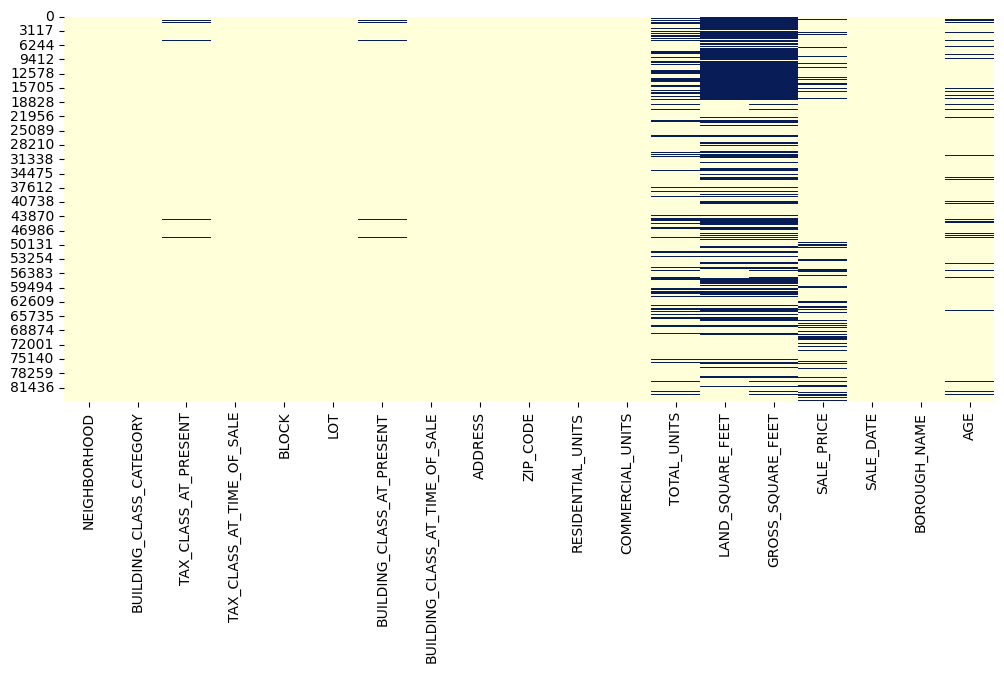

In [33]:
plt.figure(figsize = (12,5))
sns.heatmap(df.isnull(), cmap="YlGnBu", cbar=False);

### Firstly let's look at the null values in TAX CLASS AT SALE column.

When we run below code many times, it seems that integer part of TAX_CLASS_AT_PRESENT column is same in most of the data with TAX_CLASS_AT_TIME_OF_SALE. Let's check it in coming cells.

In [34]:
df[["TAX_CLASS_AT_PRESENT", "TAX_CLASS_AT_TIME_OF_SALE"]].sample(10)

,TAX_CLASS_AT_PRESENT,TAX_CLASS_AT_TIME_OF_SALE
49030,2,2
14321,2,2
59345,1,1
60150,1,1
58229,2,2
63366,2,2
27787,4,4
33724,1,1
12099,2,2
67281,1,1


Below line gives us the integer part of values TAX_CLASS_AT_PRESENT column, in next cell we will compare them with TAX CLASS AT SALE values.


In [35]:
df["TAX_CLASS_AT_PRESENT"].str[0].apply(lambda x: int(x) if x is not np.nan else x)

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
84543    1.0
84544    1.0
84545    1.0
84546    4.0
84547    4.0
Name: TAX_CLASS_AT_PRESENT, Length: 83783, dtype: float64

In [36]:
tax_present_int = df["TAX_CLASS_AT_PRESENT"].str[0].apply(lambda x: int(x) if x is not np.nan else x)

In [37]:
round(
    df[["TAX_CLASS_AT_PRESENT", "TAX_CLASS_AT_TIME_OF_SALE"]].loc[  
    tax_present_int == df["TAX_CLASS_AT_TIME_OF_SALE"]
                                                                  ].shape[0]/df.shape[0], 
    2)

0.99

The integer part of the TAX_CLASS_AT_PRESENT is same with the TAX_CLASS_AT_TIME_OF_SALE value in % 99 of the raws. So we will replace TAX_CLASS_AT_PRESENT null values with the TAX CLASS AT SALE values.

In [38]:
df["TAX_CLASS_AT_PRESENT"].fillna(
    df["TAX_CLASS_AT_TIME_OF_SALE"].loc[df["TAX_CLASS_AT_PRESENT"].isnull()], 
    inplace=True
    )

In [39]:
df["TAX_CLASS_AT_PRESENT"].unique()

array(['2A', '2', '2B', '2C', 2.0, '4', 4.0, '1', '1C', '3', '1A', '1B',
       1.0], dtype=object)

In [40]:
df["TAX_CLASS_AT_PRESENT"] = df["TAX_CLASS_AT_PRESENT"].apply(lambda x: str(int(x)) if type(x) != str else x)
df["TAX_CLASS_AT_PRESENT"].unique()

array(['2A', '2', '2B', '2C', '4', '1', '1C', '3', '1A', '1B'],
      dtype=object)

In [41]:
df["TAX_CLASS_AT_PRESENT"].value_counts()

TAX_CLASS_AT_PRESENT
1     38359
2     31291
4      6098
2A     2492
2C     1907
1A     1440
1B     1208
2B      799
1C      186
3         3
Name: count, dtype: int64

### Now Let's check the null values in BUILDING_CLASS_AT_PRESENT

In [42]:
round(df["BUILDING_CLASS_AT_PRESENT"].isnull().sum()/df.shape[0] * 100, 2)

0.88

In [43]:
df[["BUILDING_CLASS_AT_PRESENT", "BUILDING_CLASS_AT_TIME_OF_SALE"]].sample(10)

,BUILDING_CLASS_AT_PRESENT,BUILDING_CLASS_AT_TIME_OF_SALE
7533,D4,D4
7548,D4,D4
77393,A6,A6
52622,D4,D4
41556,D4,D4
15580,R4,R4
23414,B2,B2
72267,V0,V0
67042,D4,D4
81039,R3,R3


In [44]:
round(
        df[["BUILDING_CLASS_AT_PRESENT", "BUILDING_CLASS_AT_TIME_OF_SALE"]].loc[  
            (df["BUILDING_CLASS_AT_PRESENT"] == df["BUILDING_CLASS_AT_TIME_OF_SALE"])
                                                                                ].shape[0]/df.shape[0],
    2)                                                                        

0.99

99 % of the values are same in "BUILDING_CLASS_AT_PRESENT", "BUILDING_CLASS_AT_TIME_OF_SALE" columns. Let's look at the raws that are not same below.

In [45]:
df[["BUILDING_CLASS_AT_PRESENT", "BUILDING_CLASS_AT_TIME_OF_SALE"]].loc[  
    (~ df["BUILDING_CLASS_AT_PRESENT"].isnull() & (df["BUILDING_CLASS_AT_PRESENT"] != df["BUILDING_CLASS_AT_TIME_OF_SALE"]))
                                                                        ]

,BUILDING_CLASS_AT_PRESENT,BUILDING_CLASS_AT_TIME_OF_SALE
956,C4,G9
1084,RB,R5
1085,RB,R5
1086,RB,R5
2073,H1,V1
...,...,...
84048,A0,A2
84062,A0,A2
84065,A5,A9
84068,A1,A3


Above cell shows that; When we look at the non-null rows; only in 219 rows, the values in these columns are different. 
Maybe the law that determines the class is changed in between the present and the sale time or there are some wrong records.

Because nearly in %99 of "BUILDING_CLASS_AT_PRESENT" values are same with the values of "BUILDING_CLASS_AT_TIME_OF_SALE", we will fill the null values in "BUILDING_CLASS_AT_PRESENT" with the values of "BUILDING_CLASS_AT_TIME_OF_SALE".

In [46]:
df["BUILDING_CLASS_AT_PRESENT"].fillna(
    df["BUILDING_CLASS_AT_TIME_OF_SALE"].loc[df["BUILDING_CLASS_AT_PRESENT"].isnull()], 
    inplace=True
    )
    

### Now we will inspect the missing values in SQUARE FEET columns. 

In [47]:
round(df["LAND_SQUARE_FEET"].isnull().sum()/df.shape[0] * 100, 1), \
round(df["GROSS_SQUARE_FEET"].isnull().sum()/df.shape[0] * 100, 1)

(43.4, 46.2)

In [48]:
df[["LAND_SQUARE_FEET", "GROSS_SQUARE_FEET"]].sample(10)

,LAND_SQUARE_FEET,GROSS_SQUARE_FEET
5366,NaN,NaN
41054,NaN,NaN
24015,2700.0,3564.0
52181,4600.0,1770.0
58892,NaN,NaN
9461,NaN,NaN
37443,NaN,NaN
46335,NaN,NaN
5456,NaN,NaN
74880,7210.0,1400.0


Below we see that, most of the missing values are in the same rows in SQUARE FEET columns. 
In % 43 of our data both of the "LAND_SQUARE_FEET", "GROSS_SQUARE_FEET" columns are missing.

In [49]:
round(
    df[["LAND_SQUARE_FEET", "GROSS_SQUARE_FEET"]].loc[
    df["LAND_SQUARE_FEET"].isnull() & df["GROSS_SQUARE_FEET"].isnull()
                                                     ].shape[0]/df.shape[0] * 100,
    1) 
# Both GROSS_SQUARE_FEET and LAND_SQUARE_FEET missing

43.4

In [50]:
round(
    df.loc[
    df["GROSS_SQUARE_FEET"].isnull() & ~ df["LAND_SQUARE_FEET"].isnull()
    ].shape[0]/df.shape[0] * 100,
    1)

# GROSS_SQUARE_FEET is missing but LAND_SQUARE_FEET is not missing

2.9

In [51]:
round(
    df.loc[
    ~ df["GROSS_SQUARE_FEET"].isnull() & df["LAND_SQUARE_FEET"].isnull()
    ].shape[0]/df.shape[0] * 100,
    2)

# GROSS_SQUARE_FEET is not missing but LAND_SQUARE_FEET is missing

0.01

We will decide how to manage missing values in SQUARE FEET columns after the visualization of the data. 

### SALE_PRICE and SQUARE FEET combined missing values

SALE_PRICE column have % 17 missing values. Let's check if they are in the same raw with the SQUARE FEET columns or not. 

In [52]:
round(
    df.loc[
    (df["LAND_SQUARE_FEET"].isnull()) & (df["GROSS_SQUARE_FEET"].isnull() & (df["SALE_PRICE"].isnull()))
    ].shape[0]/df.shape[0] * 100,
    1)

5.8

Above we see that in our data, % 5.8 of the raws are missing in all three of these columns. SALE_PRICE is our target variable and the SQUARE FEET fit columns are important features for prediction. When three of them is missing these raws are not meaningful, so we will drop these raws. 

In [53]:
drop_list = df.loc[
    (df["LAND_SQUARE_FEET"].isnull()) & (df["GROSS_SQUARE_FEET"].isnull() & (df["SALE_PRICE"].isnull()))
    ].index

df.drop(index= drop_list, inplace = True)

### Now we will check the missing values in TOTAL_UNITS column.

In [54]:
round(df["TOTAL_UNITS"].isnull().sum()/df.shape[0] * 100, 1)

23.2

In [55]:
df.loc[
    (df["TOTAL_UNITS"].isnull()) & 
    ((df["RESIDENTIAL_UNITS"] != 0) | ( df["COMMERCIAL_UNITS"] != 0))
        ].shape[0]

0

Above cell shows us that when TOTAL_UNITS is null both residential and commercial units are also 0. 
So we can not fill TOTAL_UNITS null values with these columns.

In [56]:
round(df.loc[
    (df["RESIDENTIAL_UNITS"] == 0) & (df["COMMERCIAL_UNITS"] == 0) & ( ~ df["TOTAL_UNITS"].isnull())
       ].shape[0]/df.shape[0] * 100,
    1)

1.8

Above cell shows that we also have % 1.8 raws which have both residential and commercial units are 0 but TOTAL_UNITS is not null. Maybe these buildings don't have any residential or commercial units like schools or state buildings.  

### Now we will check missing values in AGE column

In [57]:
round(df.loc[df["AGE"].isnull()].shape[0]/df.shape[0] * 100, 
 1)

7.6

In [58]:
round(
    df[
    df["AGE"].isnull() & df["SALE_PRICE"].isnull()
].shape[0]/df.shape[0] * 100,
1)

0.8

There are % 0.8 missing values in AGE column, we will replace them with the mean age of the building in their neighborhood.

In [59]:
df['AGE'] = df['AGE'].fillna(df.groupby('NEIGHBORHOOD')['AGE'].transform('mean'))
df["AGE"] = df["AGE"].apply(lambda x: int(x))
df['AGE'].isnull().sum()

0

In [60]:
first_looking(df, "AGE")

 Column name    :  AGE 
  Data Type     :  int64
-------------------------------- 
Null values
per_of_nulls   :  % 0.0
num_of_nulls   :  0
-------------------------------- 
Value counts
AGE
103    5933
93     4942
98     4265
113    3482
73     3191
       ... 
197       1
174       1
168       1
135       1
343       1
Name: count, Length: 156, dtype: int64
-------------------------------- 
Unique values
[123 110 103 113  14  98 121  95  93  88  86 108  73  94 122  83  18  72
  34   9  15  58  10  20  17  16 124 173 118 159 106 112  40  97  60  63
 134 125  84  85  96 114  65 119 116  70  36  92  39  75  19 148  11  50
  12 101  22  91  43 115 117   8  77 102  13  69  99 105  79  33 133  32
  38 128   7  66  61  37  35  57  25 153  90 100  54   6  55  89  51  67
  41 109 120  56 111  59  68  80  62 172  23  64  47  71 107 143  53 177
  82 127  42 135  76  48  49  21  29 131 132  27  26  78  74  24  46 223
  52  81  44  45 197 104 129 142  87  30  28  31 140 176 194 179 188 171
 167 18

In [61]:
round(
    df.isnull().sum().sort_values(ascending = False).divide(df.shape[0]) * 100, 
    2)

GROSS_SQUARE_FEET                 42.91
LAND_SQUARE_FEET                  39.87
TOTAL_UNITS                       23.21
SALE_PRICE                        11.76
NEIGHBORHOOD                       0.00
RESIDENTIAL_UNITS                  0.00
BOROUGH_NAME                       0.00
SALE_DATE                          0.00
COMMERCIAL_UNITS                   0.00
ZIP_CODE                           0.00
BUILDING_CLASS_CATEGORY            0.00
ADDRESS                            0.00
BUILDING_CLASS_AT_TIME_OF_SALE     0.00
BUILDING_CLASS_AT_PRESENT          0.00
LOT                                0.00
BLOCK                              0.00
TAX_CLASS_AT_TIME_OF_SALE          0.00
TAX_CLASS_AT_PRESENT               0.00
AGE                                0.00
dtype: float64

Let's examine the 0 and other low values in SALE_PRICE column 

In [62]:
round(df.loc[df["SALE_PRICE"] == 0].shape[0]/df.shape[0] * 100, 1), \
round(df.loc[df["SALE_PRICE"] < 500].shape[0]/df.shape[0] * 100, 1), \
round(df.loc[df["SALE_PRICE"] <= 1000].shape[0]/df.shape[0] * 100, 1)

(12.7, 13.9, 14.1)

 Above we see that % 14 of the SALE_PRICE values are below 1000 dollars and most of them are 0 dollar. 
 So we assume that all of these values are symbolic values for transfers like ownership from parents to children and below we will replace these values as np.nan. Otherwise they will lead the mean SALE_PRICE to go down.

In [63]:
df["SALE_PRICE"] = df["SALE_PRICE"].apply(lambda x: np.nan if x <= 1000 else x)

In [64]:
round(
    df.isnull().sum().sort_values(ascending = False)/(df.shape[0]) * 100, 
    2)

GROSS_SQUARE_FEET                 42.91
LAND_SQUARE_FEET                  39.87
SALE_PRICE                        25.88
TOTAL_UNITS                       23.21
NEIGHBORHOOD                       0.00
RESIDENTIAL_UNITS                  0.00
BOROUGH_NAME                       0.00
SALE_DATE                          0.00
COMMERCIAL_UNITS                   0.00
ZIP_CODE                           0.00
BUILDING_CLASS_CATEGORY            0.00
ADDRESS                            0.00
BUILDING_CLASS_AT_TIME_OF_SALE     0.00
BUILDING_CLASS_AT_PRESENT          0.00
LOT                                0.00
BLOCK                              0.00
TAX_CLASS_AT_TIME_OF_SALE          0.00
TAX_CLASS_AT_PRESENT               0.00
AGE                                0.00
dtype: float64

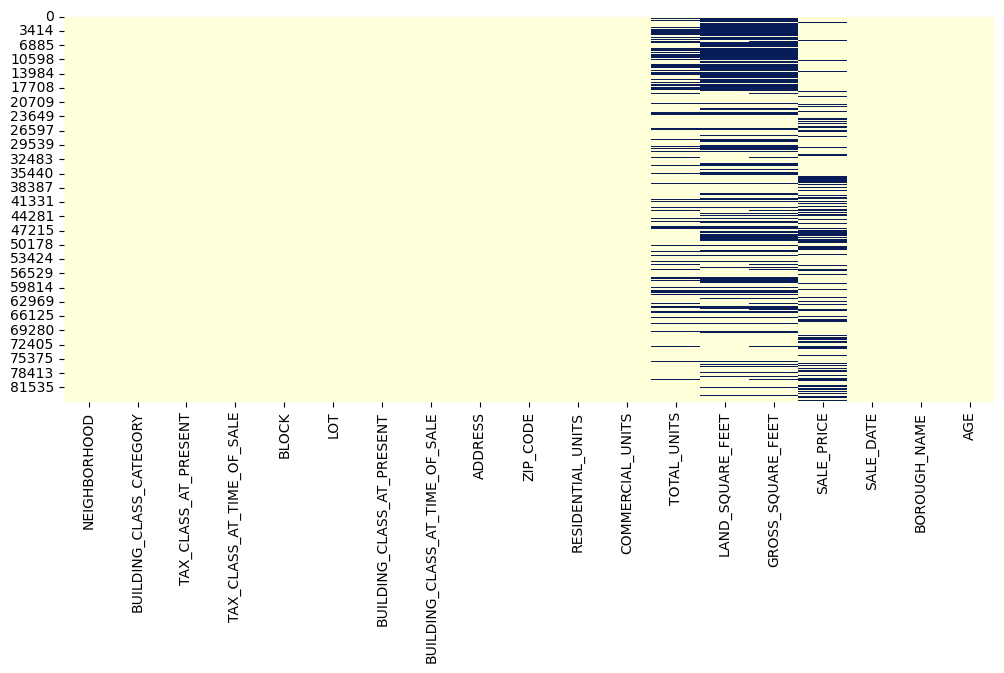

In [65]:
plt.figure(figsize = (12,5))
sns.heatmap(df.isnull(), cmap="YlGnBu", cbar=False);

## Correlations

We will check the correlation between numeric features.

In [66]:
df.corr(numeric_only=True)["SALE_PRICE"].sort_values(ascending=False)

SALE_PRICE                   1.000000
GROSS_SQUARE_FEET            0.523654
TOTAL_UNITS                  0.138205
RESIDENTIAL_UNITS            0.136739
TAX_CLASS_AT_TIME_OF_SALE    0.112224
LAND_SQUARE_FEET             0.062679
COMMERCIAL_UNITS             0.044954
LOT                          0.010010
AGE                         -0.003468
ZIP_CODE                    -0.034230
BLOCK                       -0.062392
Name: SALE_PRICE, dtype: float64

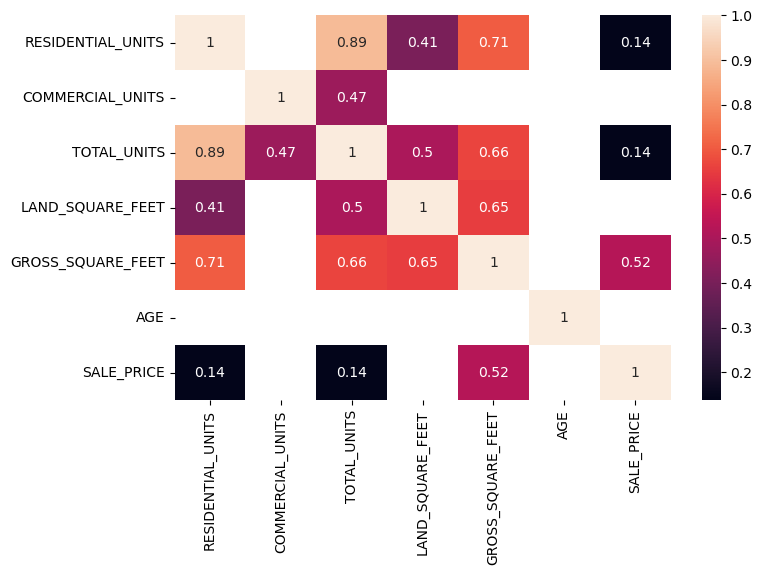

In [67]:
data = df[['RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS', 
           'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'AGE', 'SALE_PRICE',]]

plt.figure(figsize = (8, 5))
sns.heatmap(data.corr()[abs(data.corr()) > 0.1], annot = True);

In [68]:
round(
    df[
        df["TOTAL_UNITS"] == df["RESIDENTIAL_UNITS"]
      ].shape[0]/df.shape[0] * 100,
    1)

68.7

In [69]:
round(
    df[
        df["TOTAL_UNITS"] == df["COMMERCIAL_UNITS"]
      ].shape[0]/df.shape[0] * 100,
    1)

2.9

## Distribution of the Data and And Outliers    

In [70]:
df_num = df[["RESIDENTIAL_UNITS", "COMMERCIAL_UNITS", "TOTAL_UNITS", "LAND_SQUARE_FEET",
   "GROSS_SQUARE_FEET", "SALE_PRICE", "AGE"]]

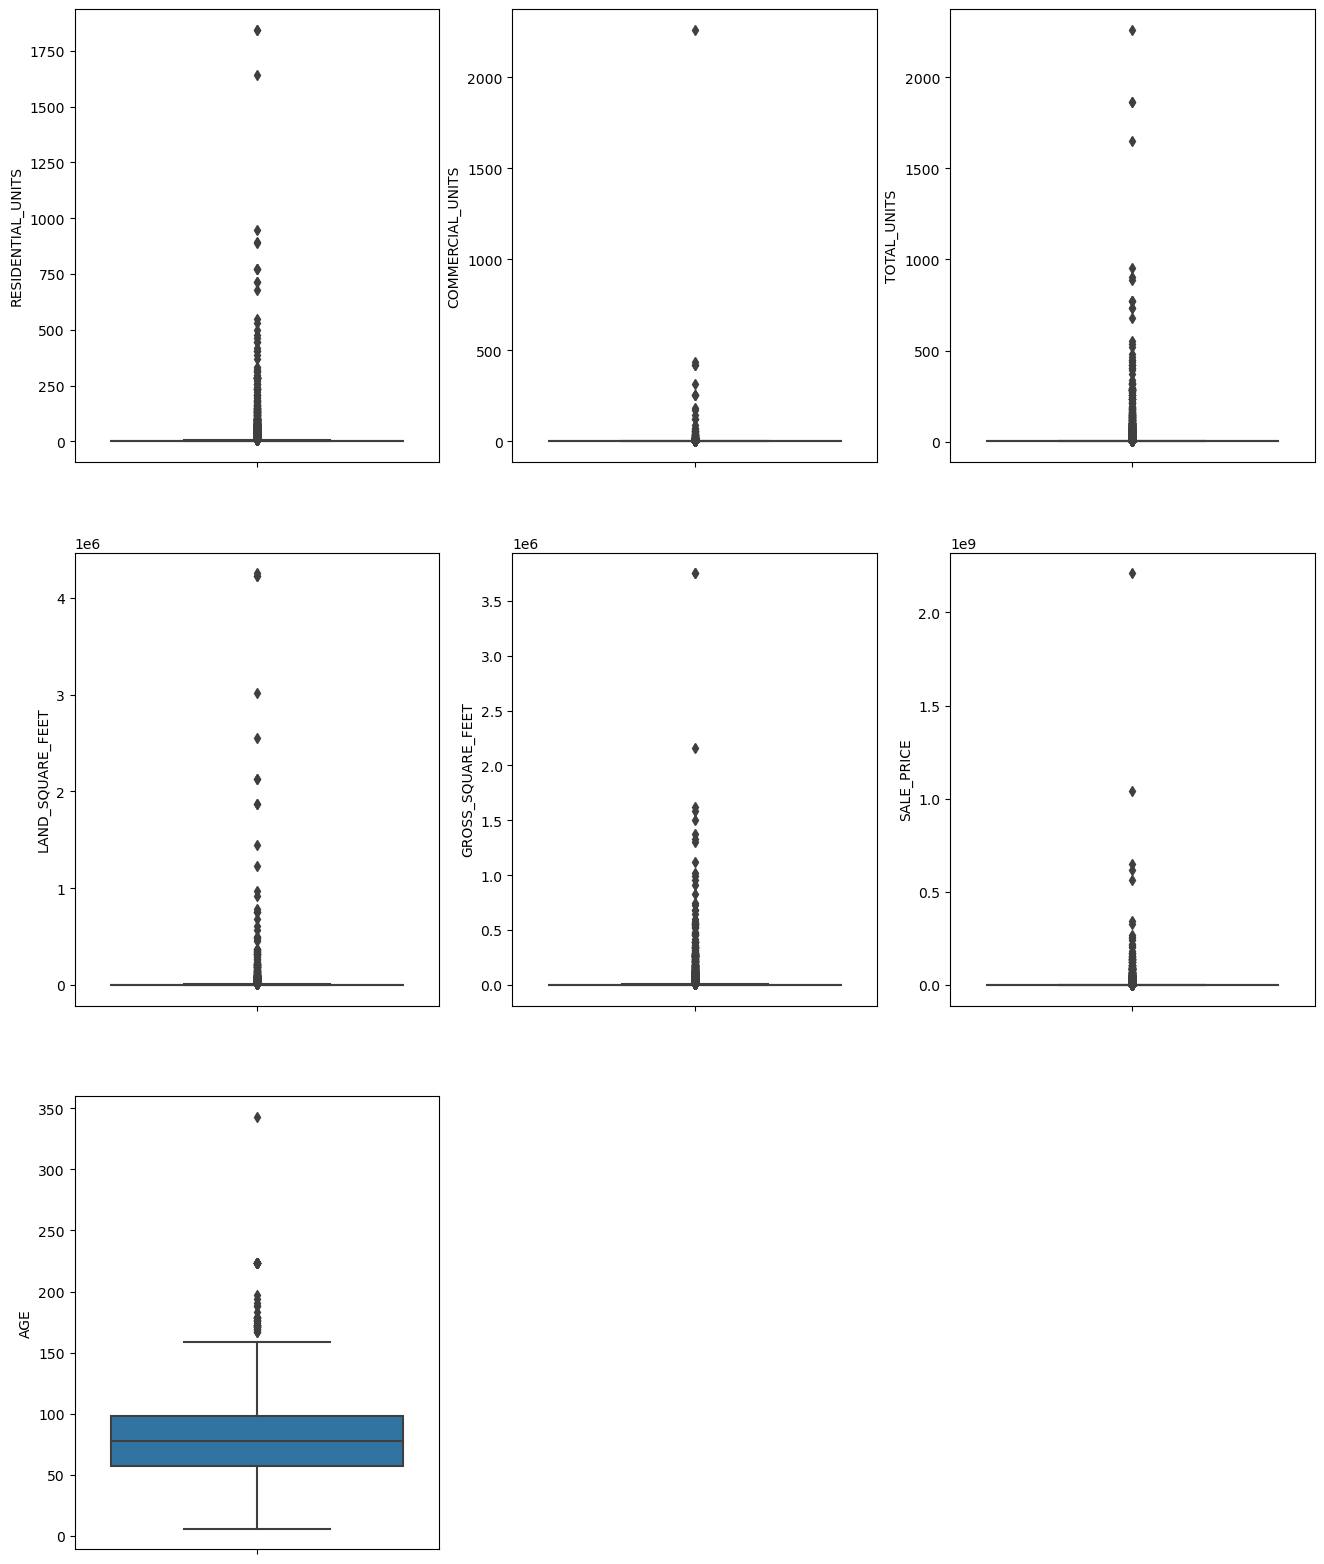

In [71]:
plt.figure(figsize= (16, 20))

i = 331
for col in df_num.columns:
 plt.subplot(i) 
 sns.boxplot(data = df_num, y = col)
 i += 1

In [72]:
def subset_by_iqr(df, column, whisker_width=1.5):
    
    """Remove outliers from a dataframe by column, including optional 
       whiskers, removing rows for which the column value are 
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
       
    Parameters:
        df:  DataFrame object
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Coefficient of IQR to calculate the limits.
        
    Returns: Filtered dataframe
    """
    # Calculate Q1, Q2 and IQR
    
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    # Apply filter with respect to IQR, including optional whiskers
    
    lower_limit = q1 - whisker_width * iqr
    upper_limit = q3 + whisker_width * iqr
    filter = (df[column] >= lower_limit) & (df[column] <= upper_limit)
    print(f"Lower limit is {lower_limit} and upper limit is {upper_limit} for {column} column. \nNew DataFrame shape is {df.loc[filter].shape}")
    return df.loc[filter]      

In [73]:
df1 = subset_by_iqr(df, "SALE_PRICE")

Lower limit is -686989.375 and upper limit is 2171729.625 for SALE_PRICE column. 
New DataFrame shape is (52252, 19)


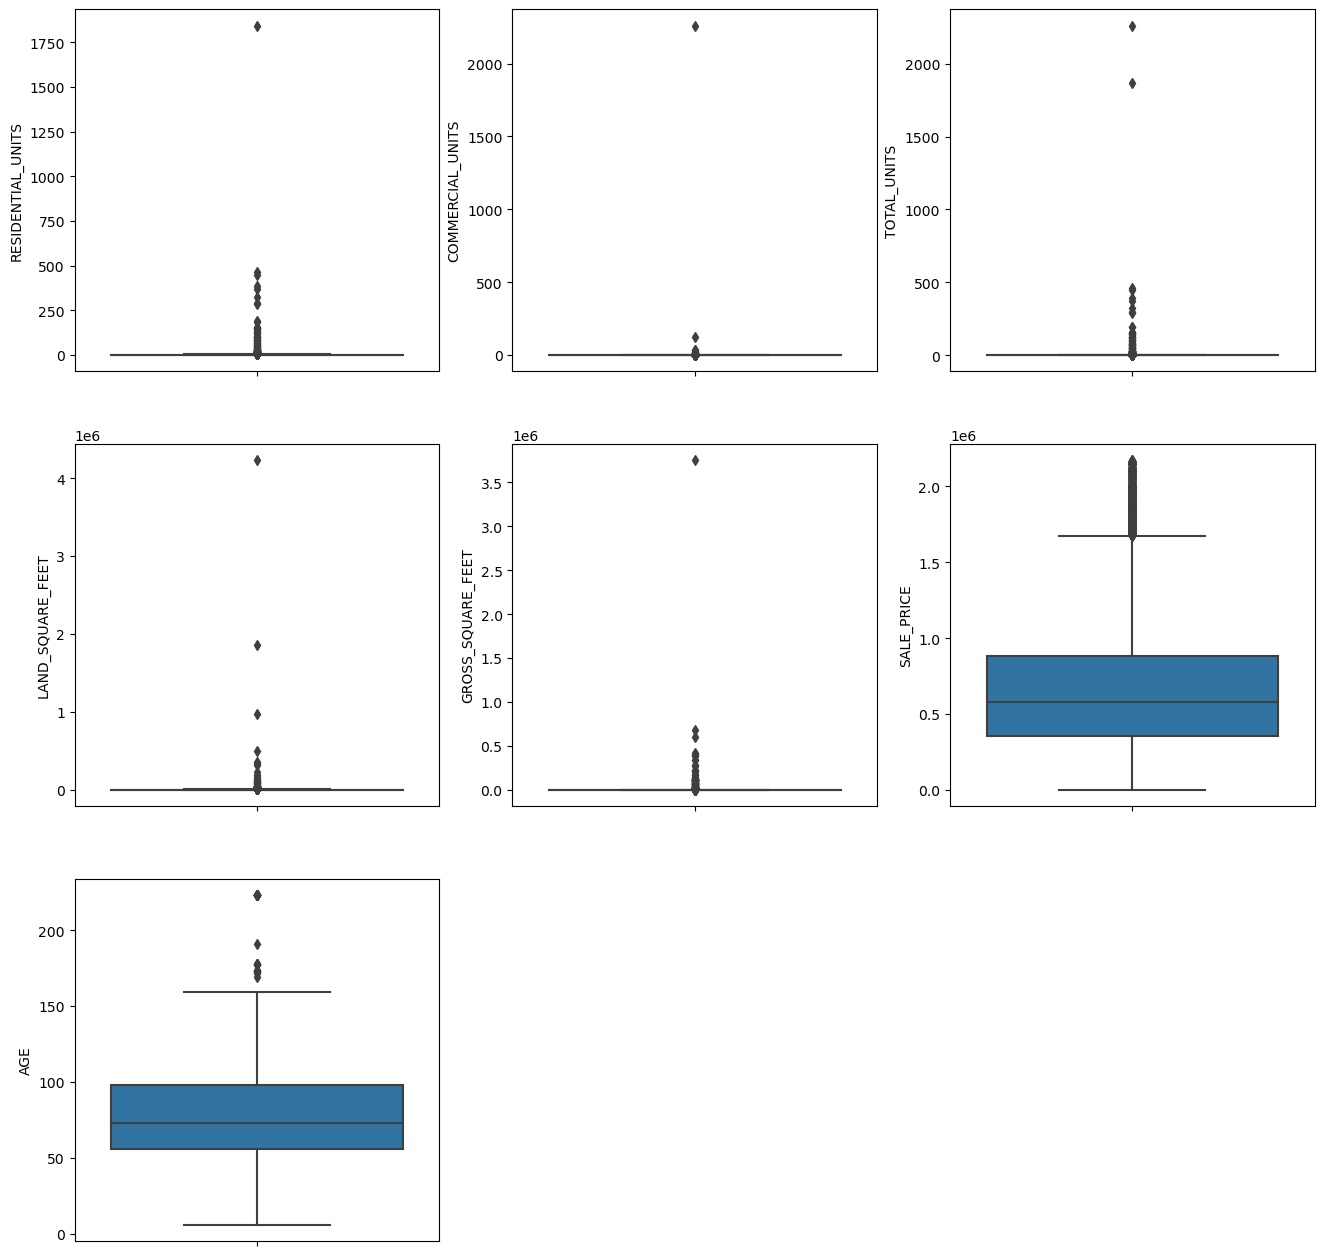

In [74]:
df1_num = df1[["RESIDENTIAL_UNITS", "COMMERCIAL_UNITS", "TOTAL_UNITS", "LAND_SQUARE_FEET",
   "GROSS_SQUARE_FEET", "SALE_PRICE", "AGE"]]

plt.figure(figsize= (16, 16))

i = 331
for col in df1_num.columns:
 plt.subplot(i) 
 sns.boxplot(data = df1_num, y = col)
 i += 1

In [75]:
df1_num.describe()

,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,SALE_PRICE,AGE
count,52252.000000,52252.000000,36897.000000,2.691500e+04,2.606500e+04,5.225200e+04,52252.000000
mean,1.207514,0.089030,1.850855,3.498138e+03,2.605093e+03,6.767396e+05,72.026143
std,9.576398,9.913729,16.448979,2.937373e+04,2.530018e+04,4.400694e+05,32.127037
min,0.000000,0.000000,1.000000,3.300000e+01,1.200000e+02,1.110000e+03,6.000000
25%,0.000000,0.000000,1.000000,2.000000e+03,1.330000e+03,3.580000e+05,56.000000
50%,1.000000,0.000000,1.000000,2.500000e+03,1.782000e+03,5.789600e+05,73.000000
75%,2.000000,0.000000,2.000000,3.840000e+03,2.400000e+03,8.850000e+05,98.000000
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2.171622e+06,223.000000


In [76]:
df2 = subset_by_iqr(df1, "GROSS_SQUARE_FEET")

Lower limit is -275.0 and upper limit is 4005.0 for GROSS_SQUARE_FEET column. 
New DataFrame shape is (24903, 19)


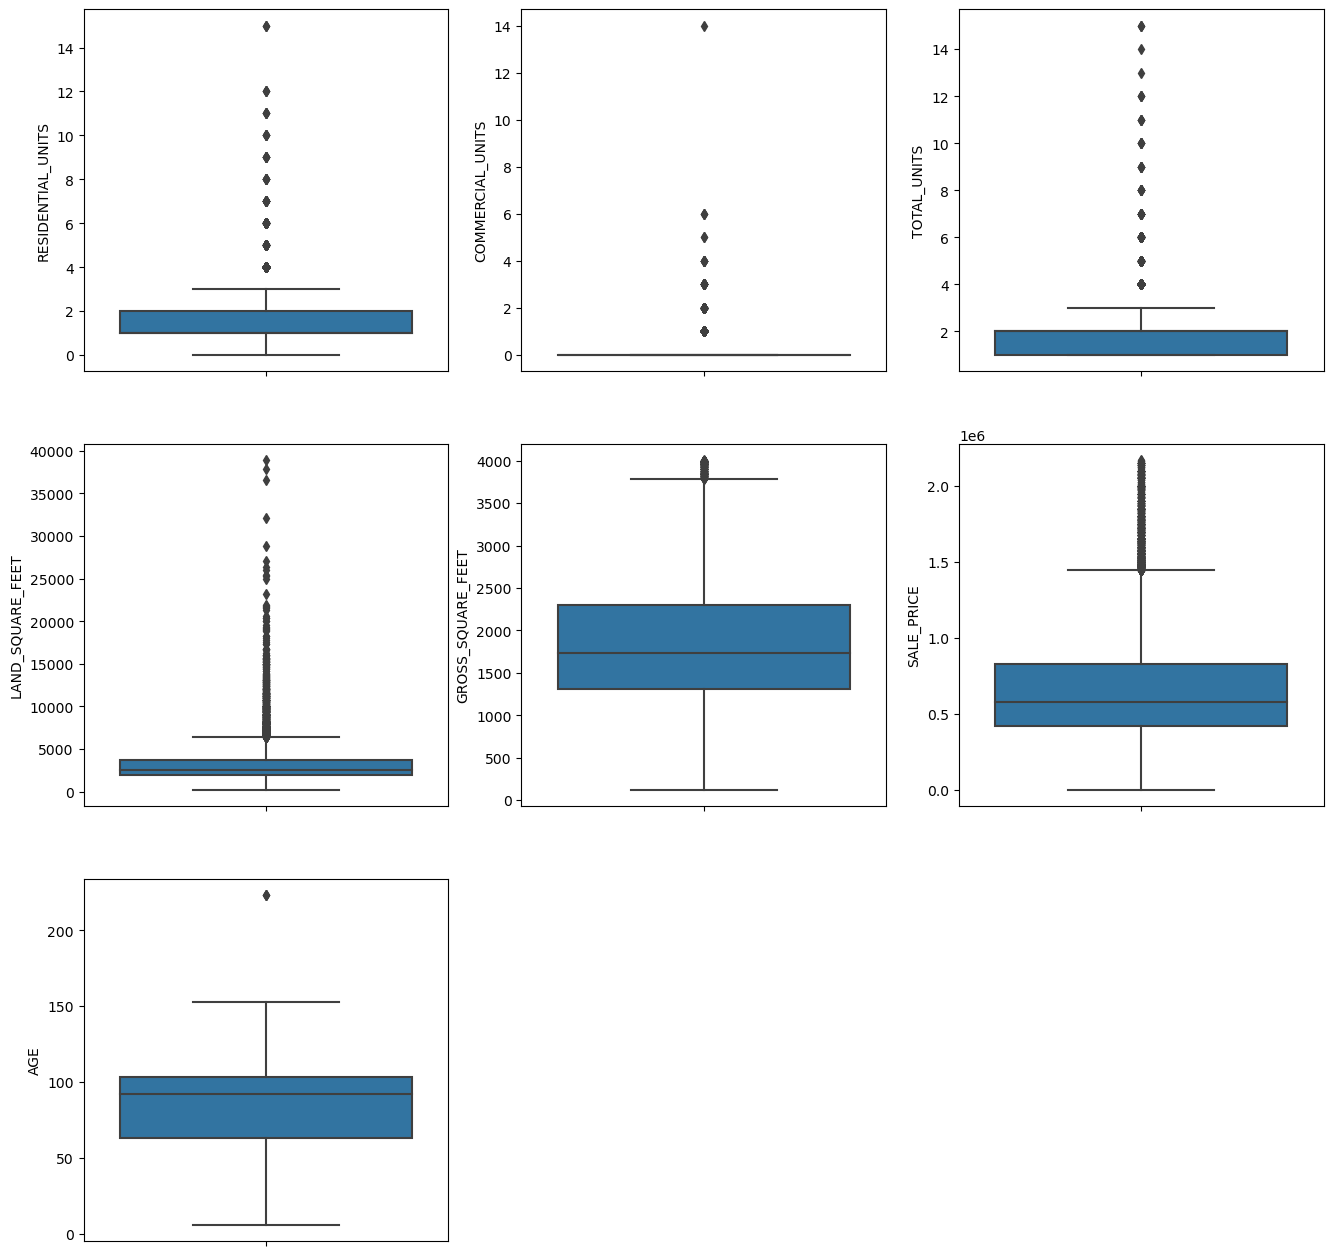

In [77]:
df2_num = df2[["RESIDENTIAL_UNITS", "COMMERCIAL_UNITS", "TOTAL_UNITS", "LAND_SQUARE_FEET",
   "GROSS_SQUARE_FEET", "SALE_PRICE", "AGE"]]

plt.figure(figsize= (16, 16))

i = 331
for col in df2_num.columns:
 plt.subplot(i) 
 sns.boxplot(data = df2_num, y = col)
 i += 1

In [78]:
df["SALE_PRICE"].loc[df["SALE_PRICE"] >= 5000000].shape[0]

2366

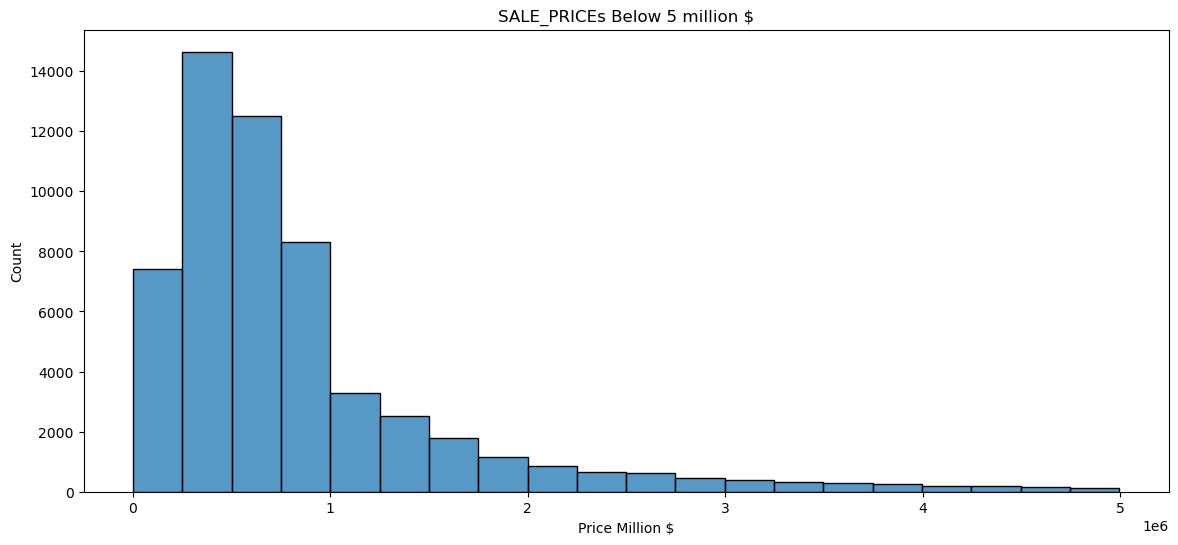

In [79]:
plt.figure(figsize=(14,6))
ax = sns.histplot( x=df["SALE_PRICE"].loc[df["SALE_PRICE"] < 5000000], bins=20)
ax.bar_label(ax.containers[0])
plt.xlabel("Price Million $")
plt.title("SALE_PRICEs Below 5 million $");


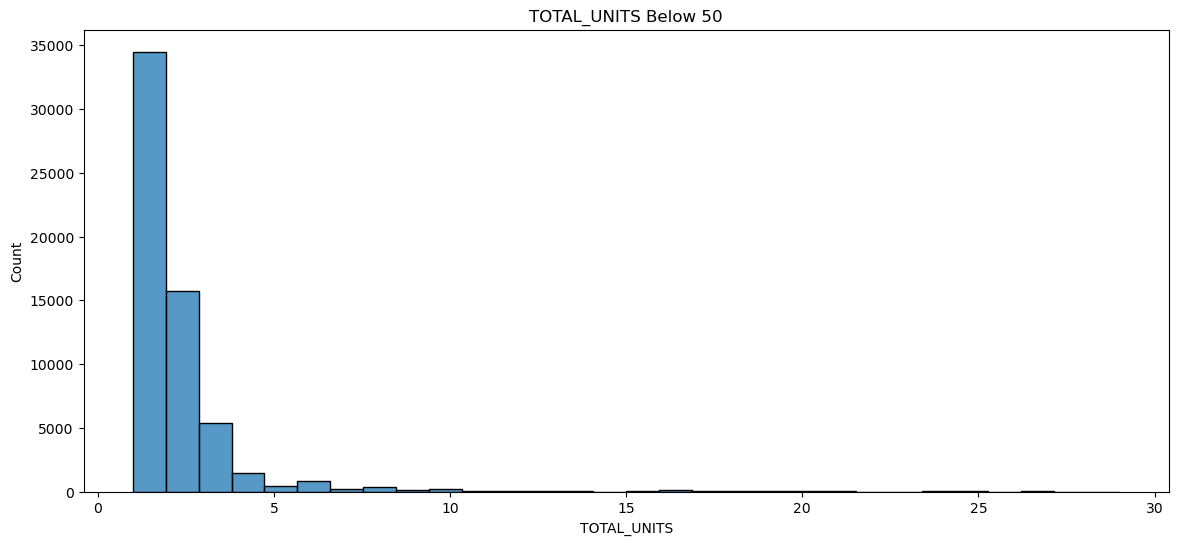

In [80]:
plt.figure(figsize=(14,6))
ax = sns.histplot( x=df["TOTAL_UNITS"].loc[df["TOTAL_UNITS"] < 30], bins=30)
ax.bar_label(ax.containers[0])
plt.title("TOTAL_UNITS Below 50");

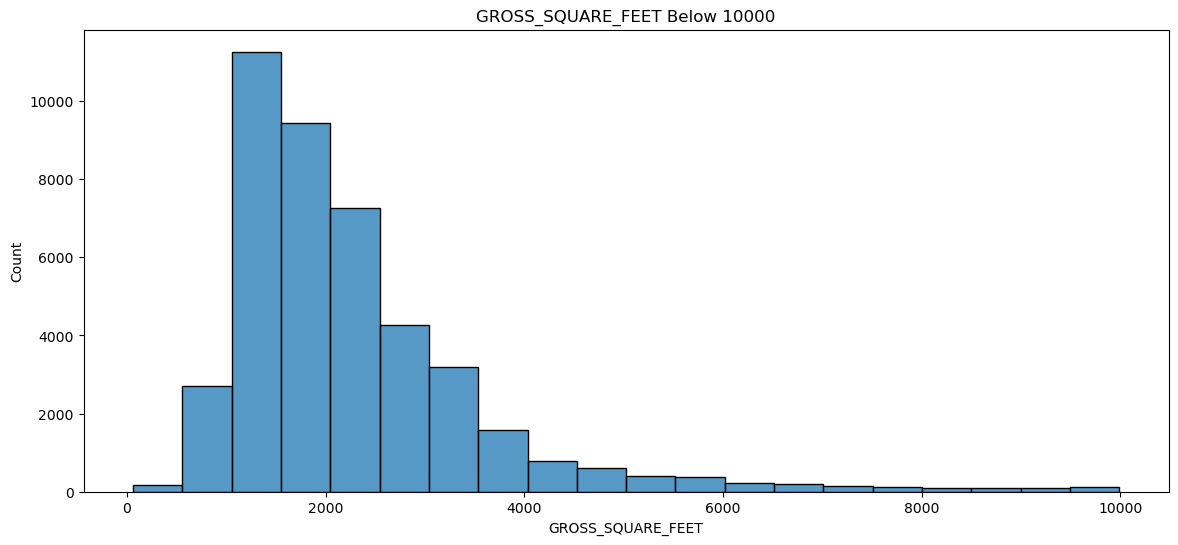

In [81]:
plt.figure(figsize=(14,6))
ax = sns.histplot( x=df["GROSS_SQUARE_FEET"].loc[df["GROSS_SQUARE_FEET"] < 10000], bins=20)
ax.bar_label(ax.containers[0])
plt.title("GROSS_SQUARE_FEET Below 10000");

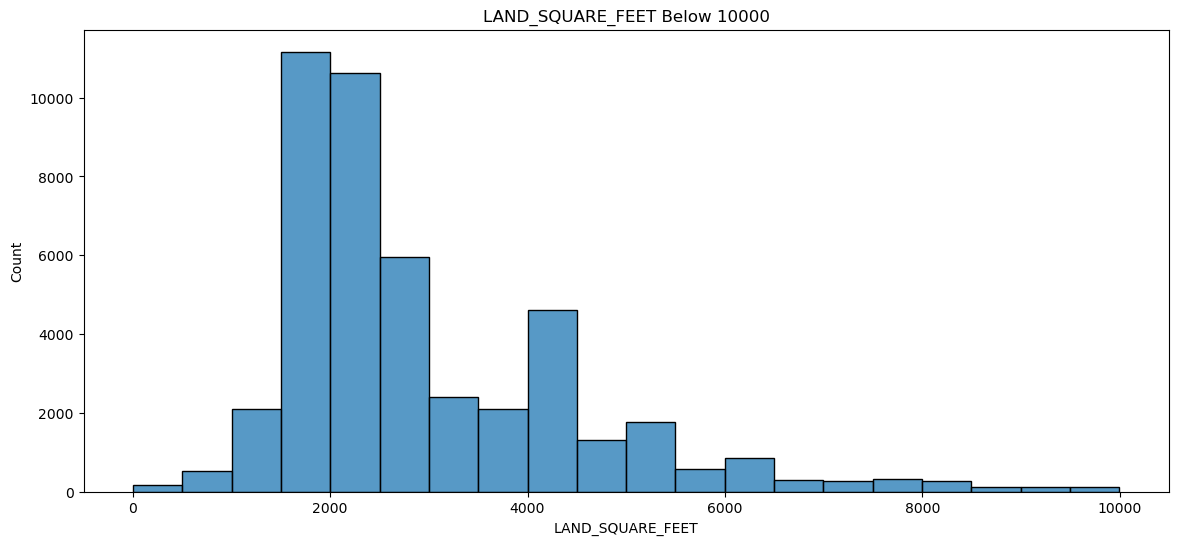

In [82]:
plt.figure(figsize=(14,6))
ax = sns.histplot( x=df["LAND_SQUARE_FEET"].loc[df["LAND_SQUARE_FEET"] < 10000], bins=20)
ax.bar_label(ax.containers[0])
plt.title("LAND_SQUARE_FEET Below 10000");

## Analysis Questions

### 1. Is there any differences among boroughs in terms of SALE_PRICE, square feet and age of the buildings ?

Borough - SALE_PRICE relation

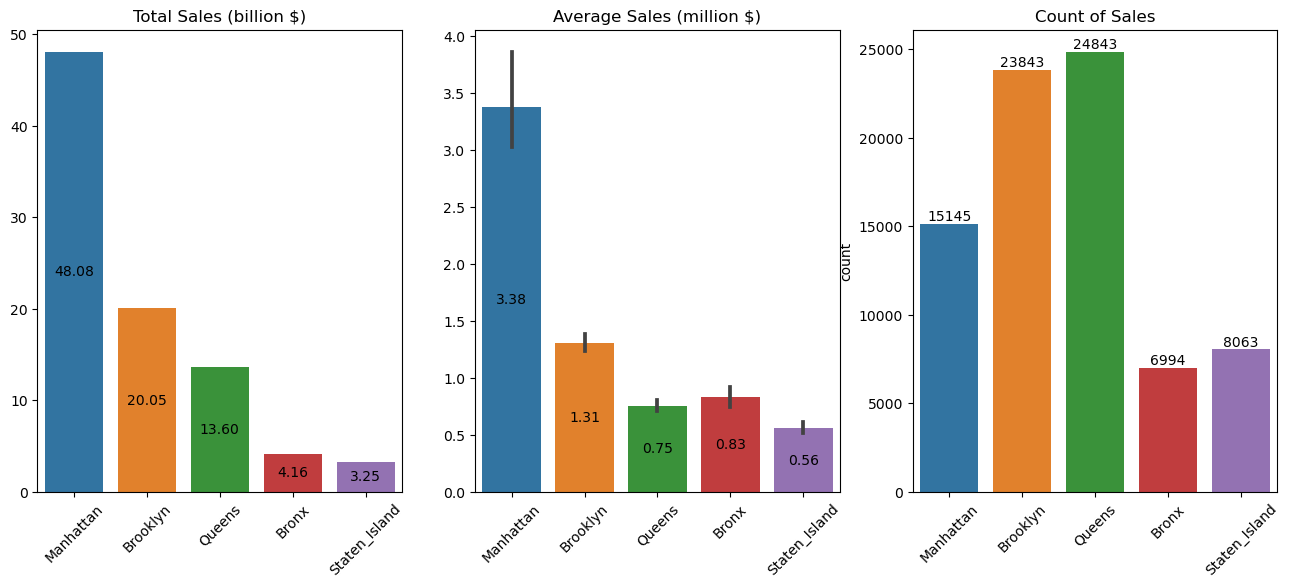

In [83]:
plt.figure(figsize=(16,6))

order = df.groupby("BOROUGH_NAME")["SALE_PRICE"].sum().sort_values(ascending = False).index


plt.subplot(131)
ax = sns.barplot(y=df["SALE_PRICE"].divide(1000000000), x=df["BOROUGH_NAME"], order = order, estimator= np.sum)
ax.bar_label(ax.containers[0],fmt="%.2f", label_type = "center")
plt.ylabel("")
plt.xlabel("")
plt.title("Total Sales (billion $)")
plt.xticks(rotation = 45);

plt.subplot(132)
ax = sns.barplot(y=df["SALE_PRICE"].divide(1000000), x=df["BOROUGH_NAME"], order = order)
ax.bar_label(ax.containers[0], fmt="%.2f", label_type = "center")
plt.ylabel("")
plt.xlabel("")
plt.title("Average Sales (million $)")
plt.xticks(rotation = 45);

plt.subplot(133)
ax = sns.countplot(data = df, x = "BOROUGH_NAME", order = order )
ax.bar_label(ax.containers[0])
plt.title("Count of Sales")
plt.xlabel("")
plt.xticks(rotation = 45);



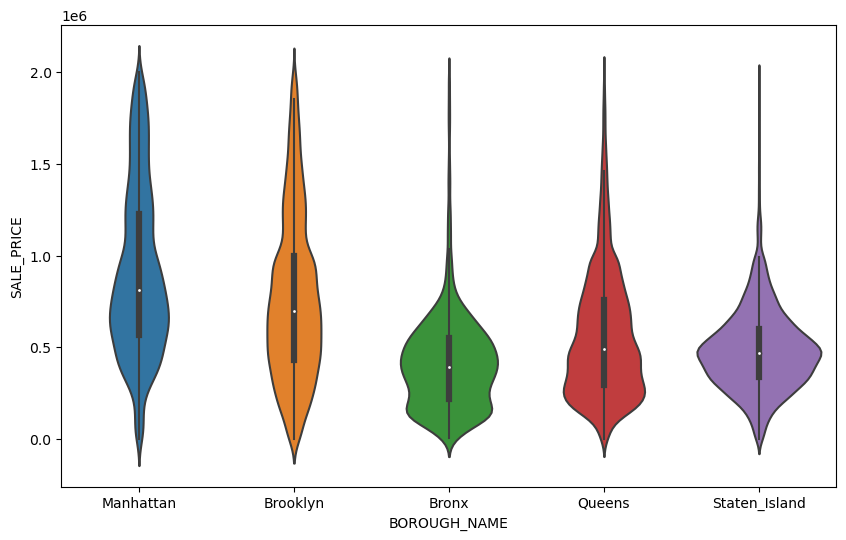

In [84]:
plt.figure(figsize=(10, 6))
order = df.groupby("BOROUGH_NAME")["SALE_PRICE"].mean().sort_values(ascending = False).index
sns.violinplot(data=df, y=df["SALE_PRICE"][df["SALE_PRICE"] < 2000000 ], x=df["BOROUGH_NAME"], order = order);

Borough - Square feet relation, Borough - Age relation

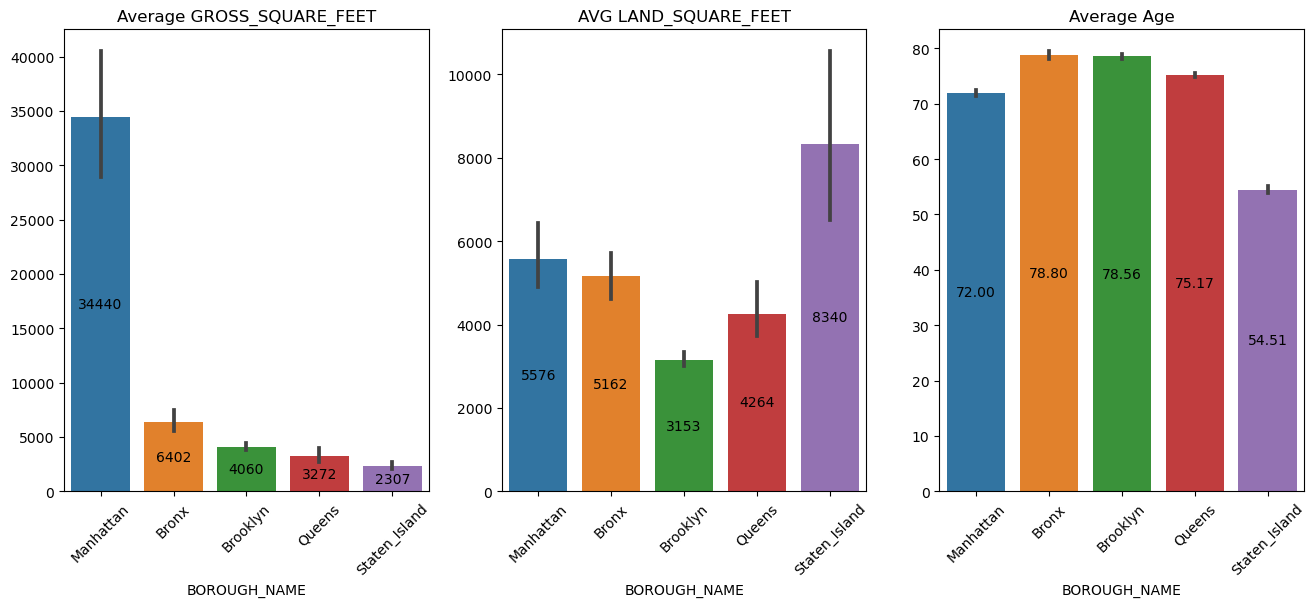

In [85]:
plt.figure(figsize=(16,6))

order = df.groupby("BOROUGH_NAME")["GROSS_SQUARE_FEET"].mean().sort_values(ascending = False).index


plt.subplot(131)
ax = sns.barplot(data=df, x="BOROUGH_NAME", y="GROSS_SQUARE_FEET")
ax.bar_label(ax.containers[0], fmt="%.0f", label_type = "center")
plt.ylabel("")
plt.title("Average GROSS_SQUARE_FEET")
plt.xticks(rotation = 45);


plt.subplot(132)
ax = sns.barplot(data=df, x="BOROUGH_NAME", y="LAND_SQUARE_FEET", order= order)
ax.bar_label(ax.containers[0], fmt="%.0f", label_type = "center")
plt.ylabel("")
plt.title("AVG LAND_SQUARE_FEET")
plt.xticks(rotation = 45);

plt.subplot(133)
ax = sns.barplot(y=df["AGE"], x=df["BOROUGH_NAME"], order = order,)
ax.bar_label(ax.containers[0], fmt="%.2f", label_type = "center")
plt.ylabel("")
plt.title("Average Age")
plt.xticks(rotation = 45);



### 2. Is there any relation between SALE_PRICE and age or square feet or TOTAL_UNITS?

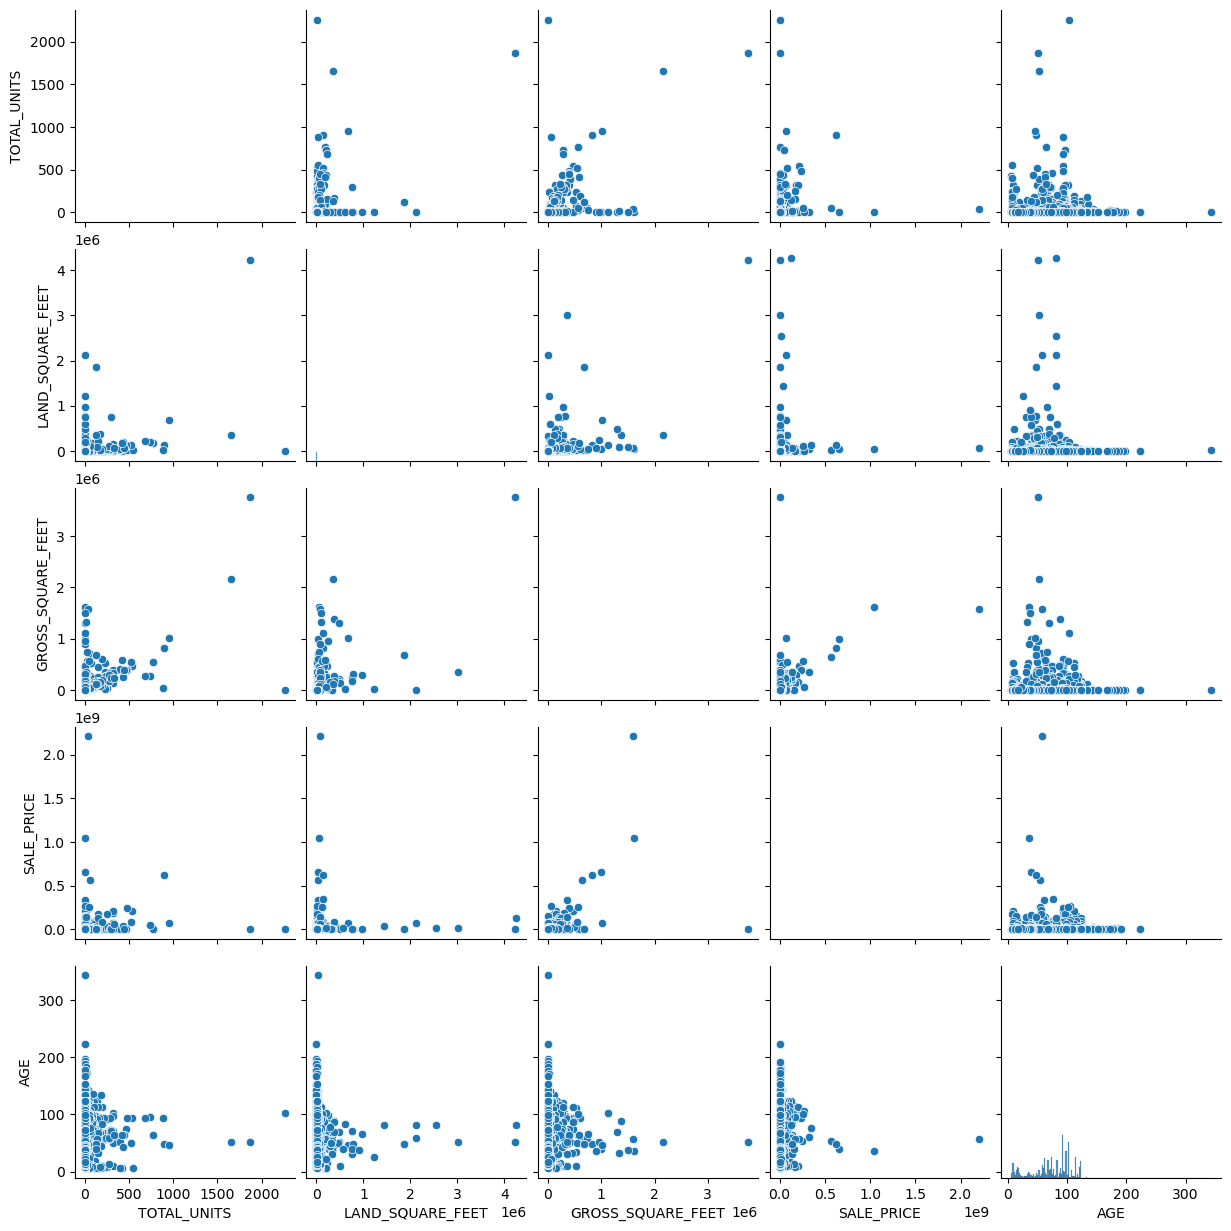

In [86]:
data = df[['TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALE_PRICE',
        'BOROUGH_NAME', 'AGE']]

sns.pairplot(data = data, 
             #hue= "BOROUGH_NAME", plot_kws={"alpha" : 0.3}
            );

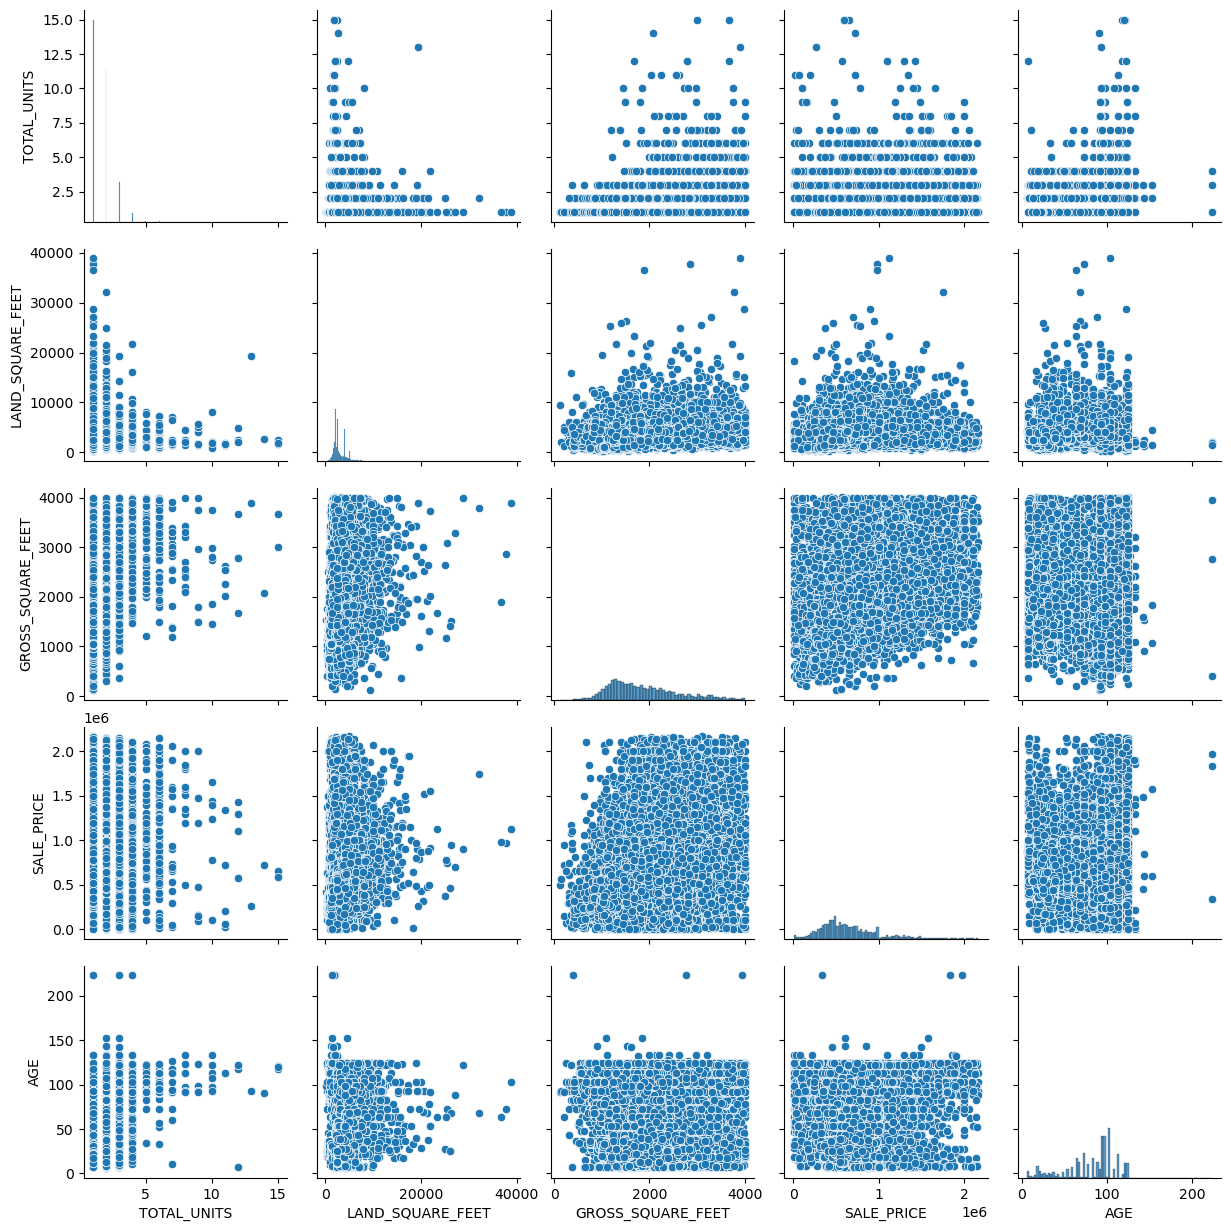

In [87]:
data = df2[['TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALE_PRICE',
        'BOROUGH_NAME', 'AGE']]

sns.pairplot(data = data, 
             #hue= "BOROUGH_NAME", plot_kws={"alpha" : 0.3}
            );

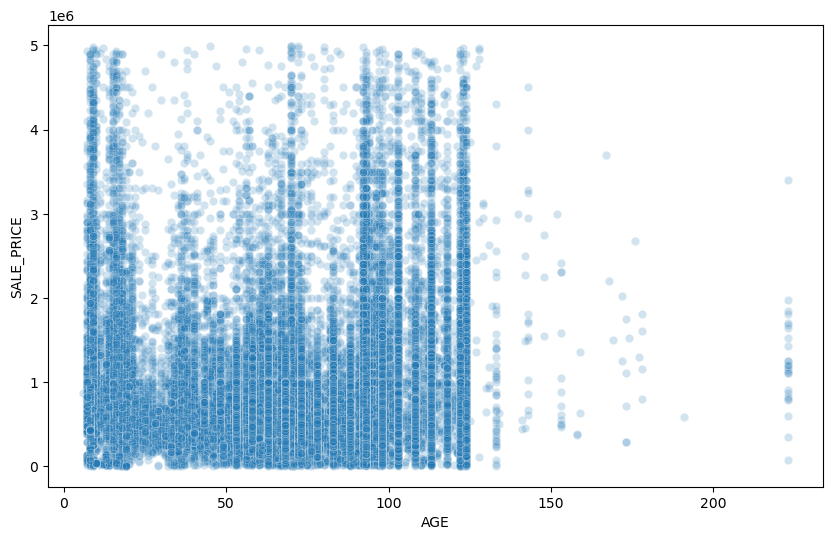

In [88]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df.loc[df["SALE_PRICE"] < 5000000], x = "AGE",  y ="SALE_PRICE", alpha= 0.2 );

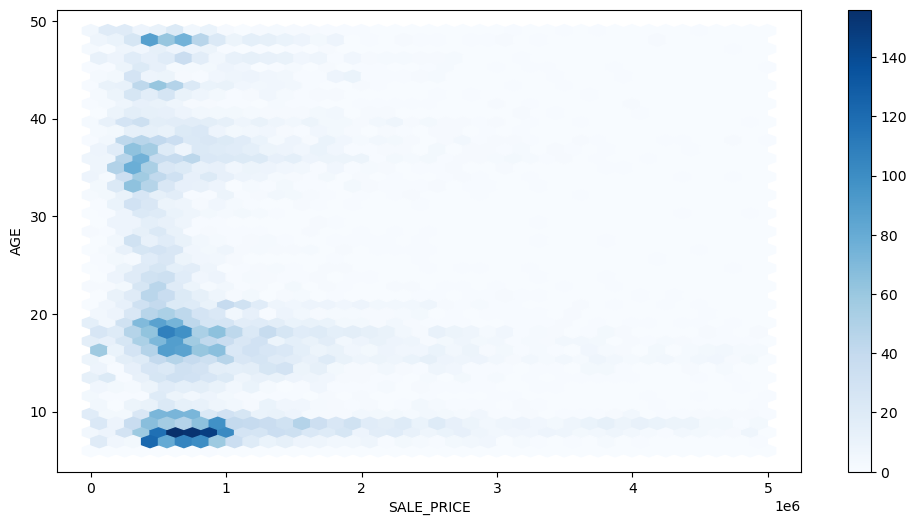

In [89]:
df[["SALE_PRICE", "AGE"]].loc[(df["SALE_PRICE"] < 5000000) &  (df["AGE"] < 50)].plot.hexbin("SALE_PRICE", "AGE", gridsize=40, 
                                                                                            figsize=(12, 6), cmap="Blues"  );

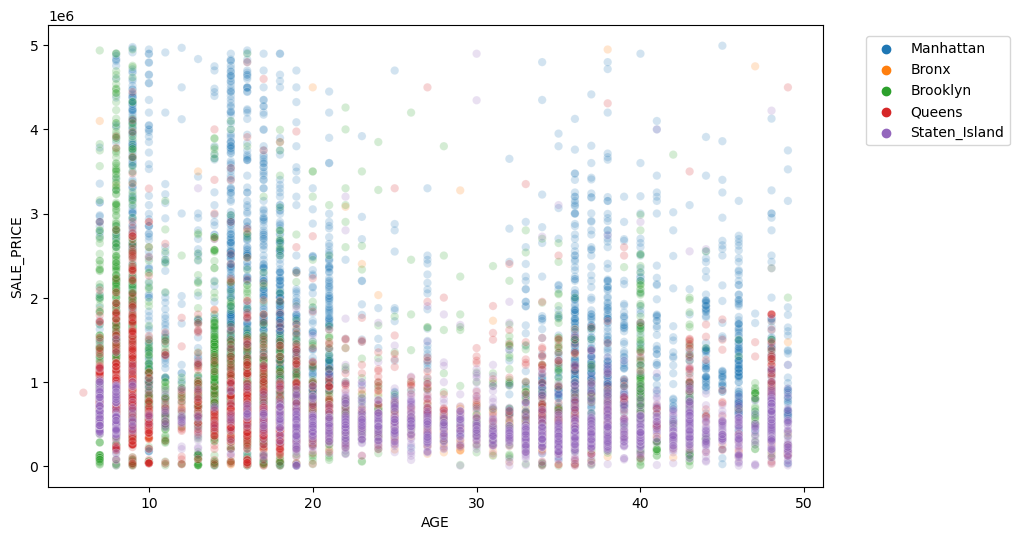

In [90]:
plt.figure(figsize = (10, 6))
ax = sns.scatterplot(data = df.loc[(df["SALE_PRICE"] < 5000000) &  (df["AGE"] < 50)], x = "AGE",  y ="SALE_PRICE", alpha= 0.2, hue= "BOROUGH_NAME" )
ax.legend(bbox_to_anchor=(1.25, 0.99));

### 3. Is there any relation between SALE_PRICE and building class or or tax class?

Sale Prıce - Tax class

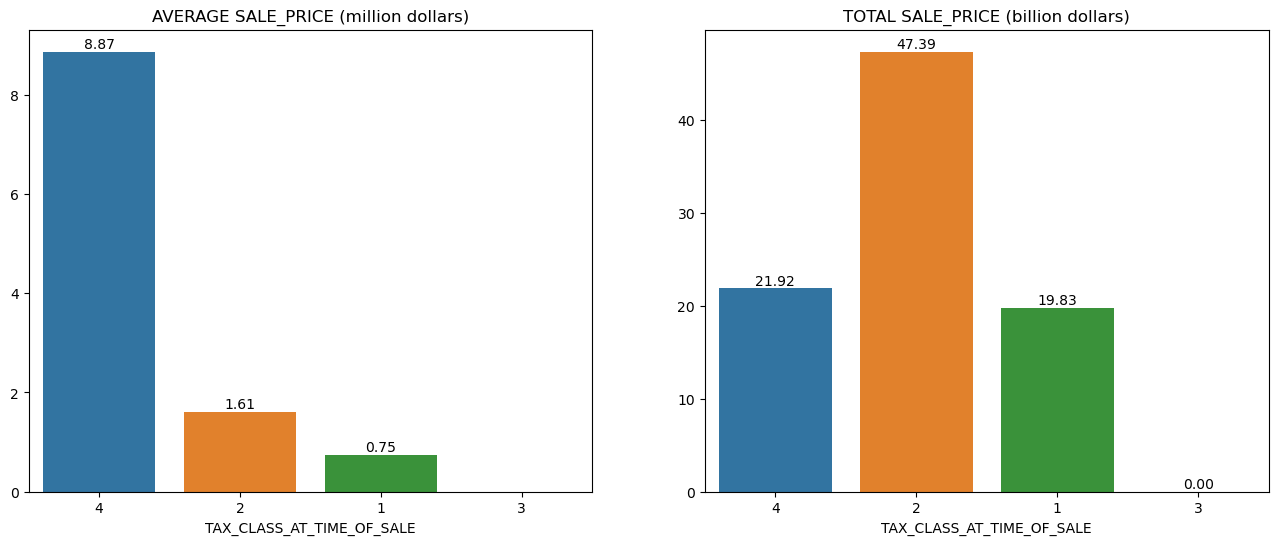

In [91]:
data = df[["SALE_PRICE", "TAX_CLASS_AT_TIME_OF_SALE"]].sort_values(by="SALE_PRICE")
order = df.groupby("TAX_CLASS_AT_TIME_OF_SALE")["SALE_PRICE"].mean().sort_values(ascending=False).index

plt.figure(figsize=(16, 6))
plt.subplot(121)
ax = sns.barplot(data=data, y=data["SALE_PRICE"].divide(1000000), x="TAX_CLASS_AT_TIME_OF_SALE", order = order, ci=None)
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.ylabel("")
plt.title("AVERAGE SALE_PRICE (million dollars)");

plt.subplot(122)
ax = sns.barplot(data=data, y=data["SALE_PRICE"].divide(1000000000), x="TAX_CLASS_AT_TIME_OF_SALE", order = order, estimator=np.sum )
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.ylabel("")
plt.title("TOTAL SALE_PRICE (billion dollars)");

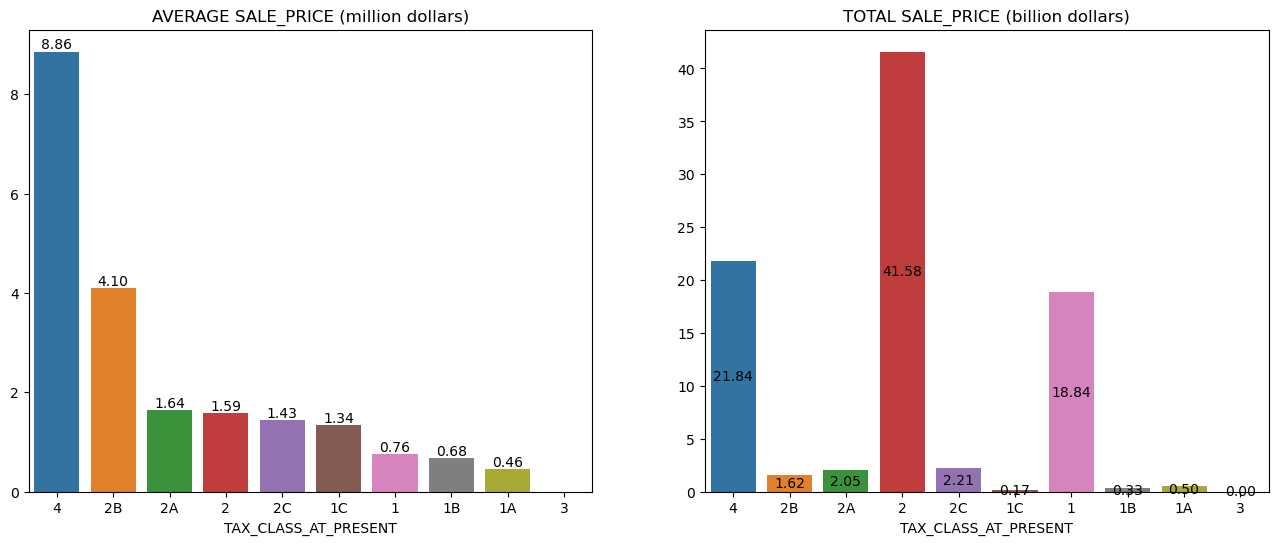

In [92]:
order = df.groupby("TAX_CLASS_AT_PRESENT")["SALE_PRICE"].mean().sort_values(ascending=False).index

plt.figure(figsize=(16, 6))
plt.subplot(121)
ax = sns.barplot(data=df, y=df["SALE_PRICE"].divide(1000000), x="TAX_CLASS_AT_PRESENT", order = order, ci=None)
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.ylabel("")
plt.title("AVERAGE SALE_PRICE (million dollars)");

plt.subplot(122)
ax = sns.barplot(data=df, y=df["SALE_PRICE"].divide(1000000000), x="TAX_CLASS_AT_PRESENT", order = order, estimator=np.sum )
ax.bar_label(ax.containers[0], fmt="%.2f", label_type = "center")
plt.ylabel("")
plt.title("TOTAL SALE_PRICE (billion dollars)");

4. Is there any relation between SALE_PRICE and building class or or SALE_DATE?

SALE_PRICE and building class

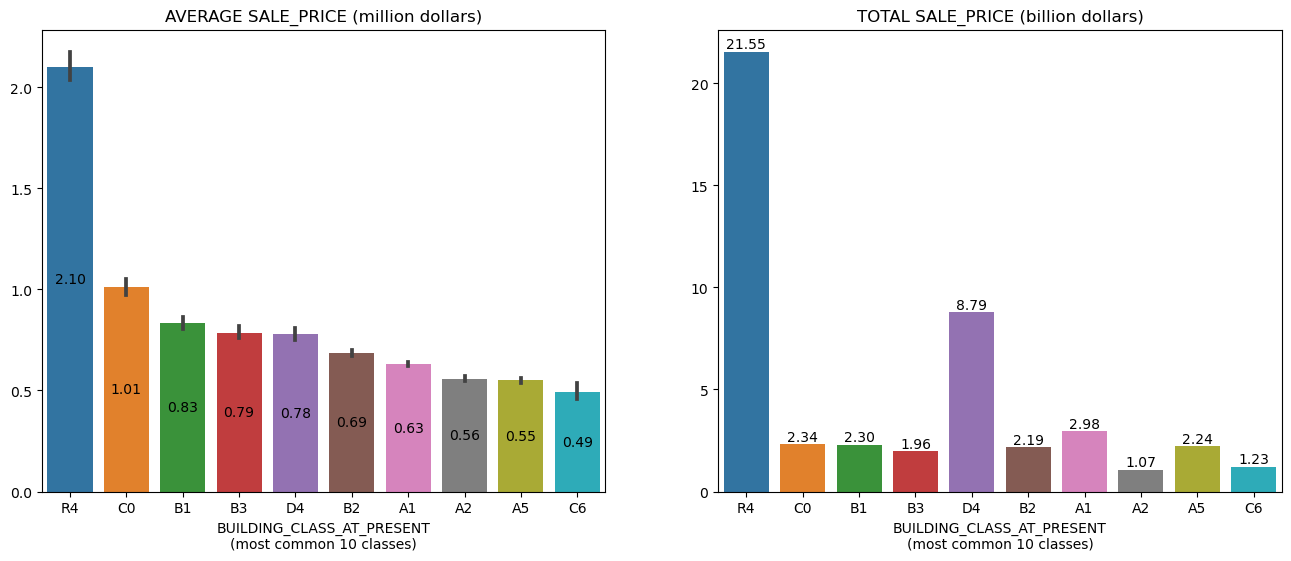

In [93]:
plt.figure(figsize=(16, 6))

data = df.loc[
    df["BUILDING_CLASS_AT_PRESENT"].isin(
        df["BUILDING_CLASS_AT_PRESENT"].value_counts().head(10).index
                                        )
            ]
order = data.groupby("BUILDING_CLASS_AT_PRESENT")["SALE_PRICE"].mean().sort_values(ascending=False).index

plt.subplot(121)
ax = sns.barplot(data= data, x="BUILDING_CLASS_AT_PRESENT", y=data["SALE_PRICE"].divide(1000000), order = order)
ax.bar_label(ax.containers[0], fmt="%.2f", label_type = "center")
plt.xlabel("BUILDING_CLASS_AT_PRESENT\n(most common 10 classes)")
plt.ylabel("")
plt.title("AVERAGE SALE_PRICE (million dollars)")

plt.subplot(122)
ax = sns.barplot(data= data, x="BUILDING_CLASS_AT_PRESENT", y=data["SALE_PRICE"].divide(1000000000), order = order, estimator=np.sum)
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.xlabel("BUILDING_CLASS_AT_PRESENT\n(most common 10 classes)")
plt.ylabel("")
plt.title("TOTAL SALE_PRICE (billion dollars)");


In [94]:
df.columns

Index(['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BLOCK', 'LOT',
       'BUILDING_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'ADDRESS', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS',
       'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALE_PRICE',
       'SALE_DATE', 'BOROUGH_NAME', 'AGE'],
      dtype='object')

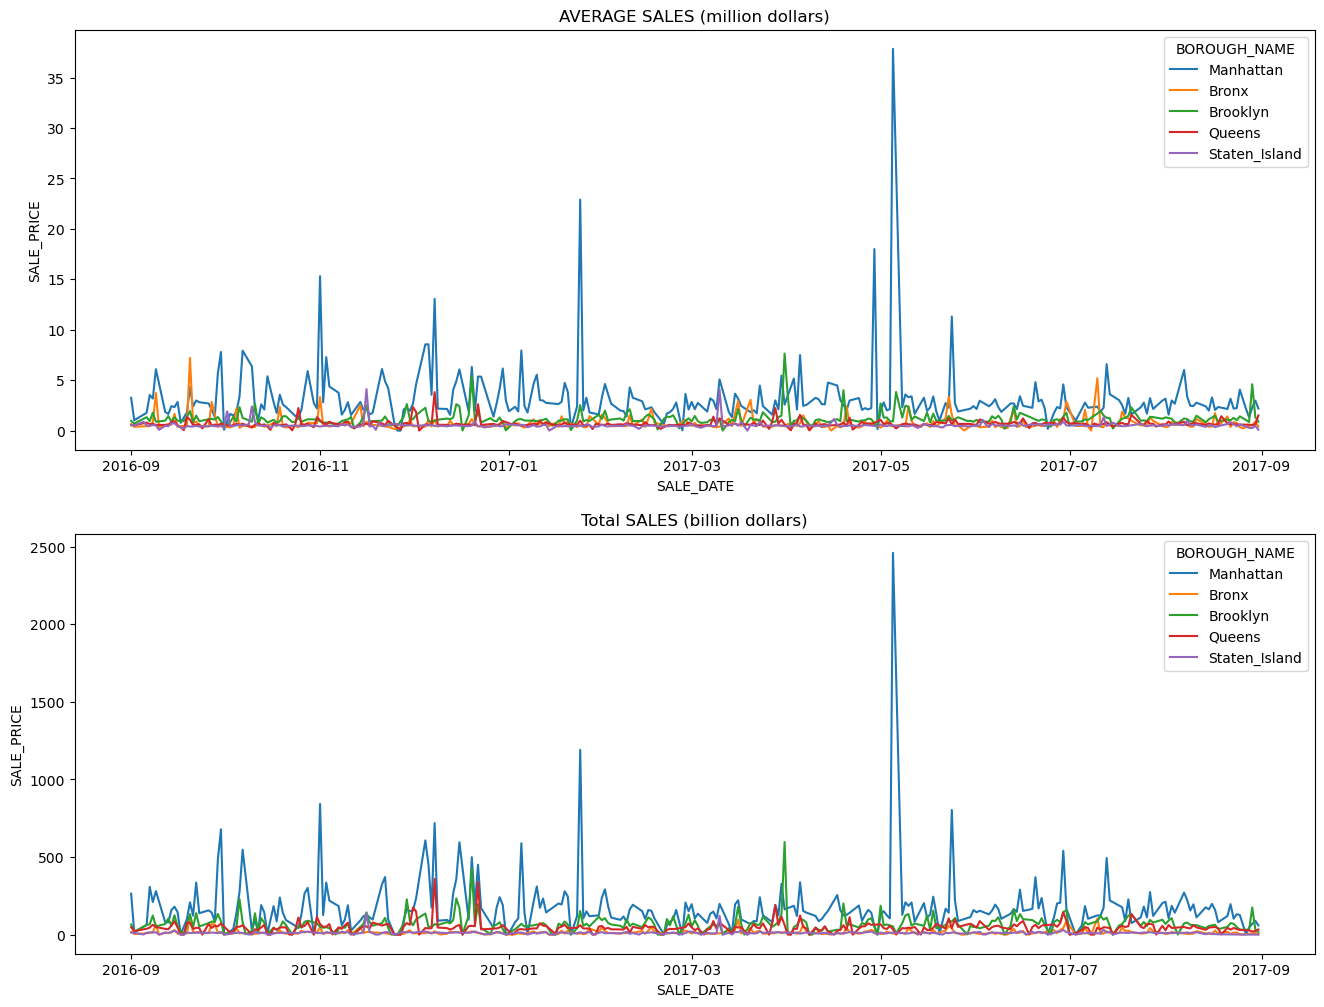

In [95]:
plt.figure(figsize=(16,12))

plt.subplot(211)
sns.lineplot(data=df, x= 'SALE_DATE', y= df['SALE_PRICE'].divide(1000000), hue="BOROUGH_NAME", ci=None)
plt.title("AVERAGE SALES (million dollars)");

plt.subplot(212)
sns.lineplot(data=df, x= 'SALE_DATE', y= df['SALE_PRICE'].divide(1000000), hue="BOROUGH_NAME", ci=None, estimator=np.sum)
plt.title("Total SALES (billion dollars)");

In [96]:
df.isnull().sum()

NEIGHBORHOOD                          0
BUILDING_CLASS_CATEGORY               0
TAX_CLASS_AT_PRESENT                  0
TAX_CLASS_AT_TIME_OF_SALE             0
BLOCK                                 0
LOT                                   0
BUILDING_CLASS_AT_PRESENT             0
BUILDING_CLASS_AT_TIME_OF_SALE        0
ADDRESS                               0
ZIP_CODE                              0
RESIDENTIAL_UNITS                     0
COMMERCIAL_UNITS                      0
TOTAL_UNITS                       18310
LAND_SQUARE_FEET                  31456
GROSS_SQUARE_FEET                 33850
SALE_PRICE                        20418
SALE_DATE                             0
BOROUGH_NAME                          0
AGE                                   0
dtype: int64

In [97]:
df.to_csv("NYC_SALES_CLEAN.csv", index = False, encoding='utf-8')

In [98]:
df2.shape

(24903, 19)

In [99]:
df2.isnull().sum()

NEIGHBORHOOD                       0
BUILDING_CLASS_CATEGORY            0
TAX_CLASS_AT_PRESENT               0
TAX_CLASS_AT_TIME_OF_SALE          0
BLOCK                              0
LOT                                0
BUILDING_CLASS_AT_PRESENT          0
BUILDING_CLASS_AT_TIME_OF_SALE     0
ADDRESS                            0
ZIP_CODE                           0
RESIDENTIAL_UNITS                  0
COMMERCIAL_UNITS                   0
TOTAL_UNITS                       19
LAND_SQUARE_FEET                   0
GROSS_SQUARE_FEET                  0
SALE_PRICE                         0
SALE_DATE                          0
BOROUGH_NAME                       0
AGE                                0
dtype: int64

In [100]:
df2.dropna().to_csv("NYC_clean_without_outliers.csv", index = False, encoding='utf-8')

In [101]:
df.columns

Index(['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BLOCK', 'LOT',
       'BUILDING_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'ADDRESS', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS',
       'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'SALE_PRICE',
       'SALE_DATE', 'BOROUGH_NAME', 'AGE'],
      dtype='object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78888 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEIGHBORHOOD                    78888 non-null  object        
 1   BUILDING_CLASS_CATEGORY         78888 non-null  object        
 2   TAX_CLASS_AT_PRESENT            78888 non-null  object        
 3   TAX_CLASS_AT_TIME_OF_SALE       78888 non-null  int64         
 4   BLOCK                           78888 non-null  int64         
 5   LOT                             78888 non-null  int64         
 6   BUILDING_CLASS_AT_PRESENT       78888 non-null  object        
 7   BUILDING_CLASS_AT_TIME_OF_SALE  78888 non-null  object        
 8   ADDRESS                         78888 non-null  object        
 9   ZIP_CODE                        78888 non-null  int64         
 10  RESIDENTIAL_UNITS               78888 non-null  int64         
 11  COMMERC